In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.model_selection import cross_val_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
df_origin = pd.read_csv('train.csv')
df = df_origin.copy()
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [7]:
df['host_has_profile_pic'].value_counts()

host_has_profile_pic
t    73697
f      226
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [9]:
df.shape

(74111, 29)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74111.0,1.126662e+07,6.081735e+06,344.000000,6.261964e+06,1.225415e+07,1.640226e+07,2.123090e+07
log_price,74111.0,4.782069e+00,7.173938e-01,0.000000,4.317488e+00,4.709530e+00,5.220356e+00,7.600402e+00
accommodates,74111.0,3.155146e+00,2.153589e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,73911.0,1.235263e+00,5.820441e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
latitude,74111.0,3.844596e+01,3.080167e+00,33.338905,3.412791e+01,4.066214e+01,4.074610e+01,4.239044e+01
longitude,74111.0,-9.239753e+01,2.170532e+01,-122.511500,-1.183424e+02,-7.699696e+01,-7.395466e+01,-7.098505e+01
number_of_reviews,74111.0,2.090057e+01,3.782864e+01,0.000000,1.000000e+00,6.000000e+00,2.300000e+01,6.050000e+02
review_scores_rating,57389.0,9.406736e+01,7.836556e+00,20.000000,9.200000e+01,9.600000e+01,1.000000e+02,1.000000e+02
bedrooms,74020.0,1.265793e+00,8.521435e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01
beds,73980.0,1.710868e+00,1.254142e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.800000e+01


In [11]:
df.nunique()

id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73479
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74111
longitude                 74111
name                      73359
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
thumbnail_url             65883
zipcode                     769
bedrooms                     11
beds                         18
dtype: int64

In [12]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [13]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [14]:
missing_percentage = df.isnull().mean() * 100
# Filter columns with missing values
columns_with_missing_values = missing_percentage[missing_percentage > 0]
# Print the columns with missing values and their percentages
for column, percentage in columns_with_missing_values.items():
    print(f"{column}' : {percentage:.2f}%")

bathrooms' : 0.27%
first_review' : 21.41%
host_has_profile_pic' : 0.25%
host_identity_verified' : 0.25%
host_response_rate' : 24.69%
host_since' : 0.25%
last_review' : 21.36%
neighbourhood' : 9.27%
review_scores_rating' : 22.56%
thumbnail_url' : 11.09%
zipcode' : 1.30%
bedrooms' : 0.12%
beds' : 0.18%


In [15]:
pd.set_option('display.max_colwidth', 0)
df[['property_type','room_type','bed_type','cancellation_policy',
      'cleaning_fee','city','host_has_profile_pic','host_identity_verified',
     'host_response_rate','instant_bookable','neighbourhood']].agg(['unique']).transpose()

,unique
property_type,"[Apartment, House, Condominium, Loft, Townhouse, Hostel, Guest suite, Bed & Breakfast, Bungalow, Guesthouse, Dorm, Other, Camper/RV, Villa, Boutique hotel, Timeshare, In-law, Boat, Serviced apartment, Castle, Cabin, Treehouse, Tipi, Vacation home, Tent, Hut, Casa particular, Chalet, Yurt, Earth House, Parking Space, Train, Cave, Lighthouse, Island]"
room_type,"[Entire home/apt, Private room, Shared room]"
bed_type,"[Real Bed, Futon, Pull-out Sofa, Couch, Airbed]"
cancellation_policy,"[strict, moderate, flexible, super_strict_30, super_strict_60]"
cleaning_fee,"[True, False]"
city,"[NYC, SF, DC, LA, Chicago, Boston]"
host_has_profile_pic,"[t, nan, f]"
host_identity_verified,"[t, f, nan]"
host_response_rate,"[nan, 100%, 71%, 68%, 67%, 83%, 50%, 90%, 86%, 92%, 82%, 80%, 89%, 93%, 99%, 0%, 88%, 96%, 70%, 94%, 91%, 25%, 95%, 98%, 62%, 29%, 33%, 81%, 63%, 38%, 60%, 79%, 78%, 75%, 65%, 97%, 87%, 40%, 54%, 53%, 58%, 76%, 30%, 64%, 17%, 20%, 77%, 73%, 41%, 59%, 57%, 85%, 56%, 42%, 44%, 35%, 14%, 74%, 27%, 10%, 84%, 6%, 72%, 36%, 55%, 43%, 13%, 39%, 46%, 26%, 61%, 52%, 23%, 22%, 69%, 66%, 15%, 11%, 31%, 21%, 47%]"
instant_bookable,"[f, t]"


In [16]:
duplicates = df.duplicated(keep=False)
print(df[duplicates])

Empty DataFrame
Columns: [id, log_price, property_type, room_type, amenities, accommodates, bathrooms, bed_type, cancellation_policy, cleaning_fee, city, description, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, instant_bookable, last_review, latitude, longitude, name, neighbourhood, number_of_reviews, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds]
Index: []

[0 rows x 29 columns]


In [17]:
#dropping duplicated colunms
df=df.drop_duplicates()

In [18]:
del df['description']
del df['name']
del df['id']

In [19]:
#We created a pair of scatterplots that are used to visualize 
  #the relationship of variables in the DataFrame to each other.
# import seaborn as sns
# sns.pairplot(df, kind  ="reg");

In [20]:
# df['id']

In [21]:
# Id is dropped since it has no affect.
# df.drop("id" , axis=1 , inplace=True)

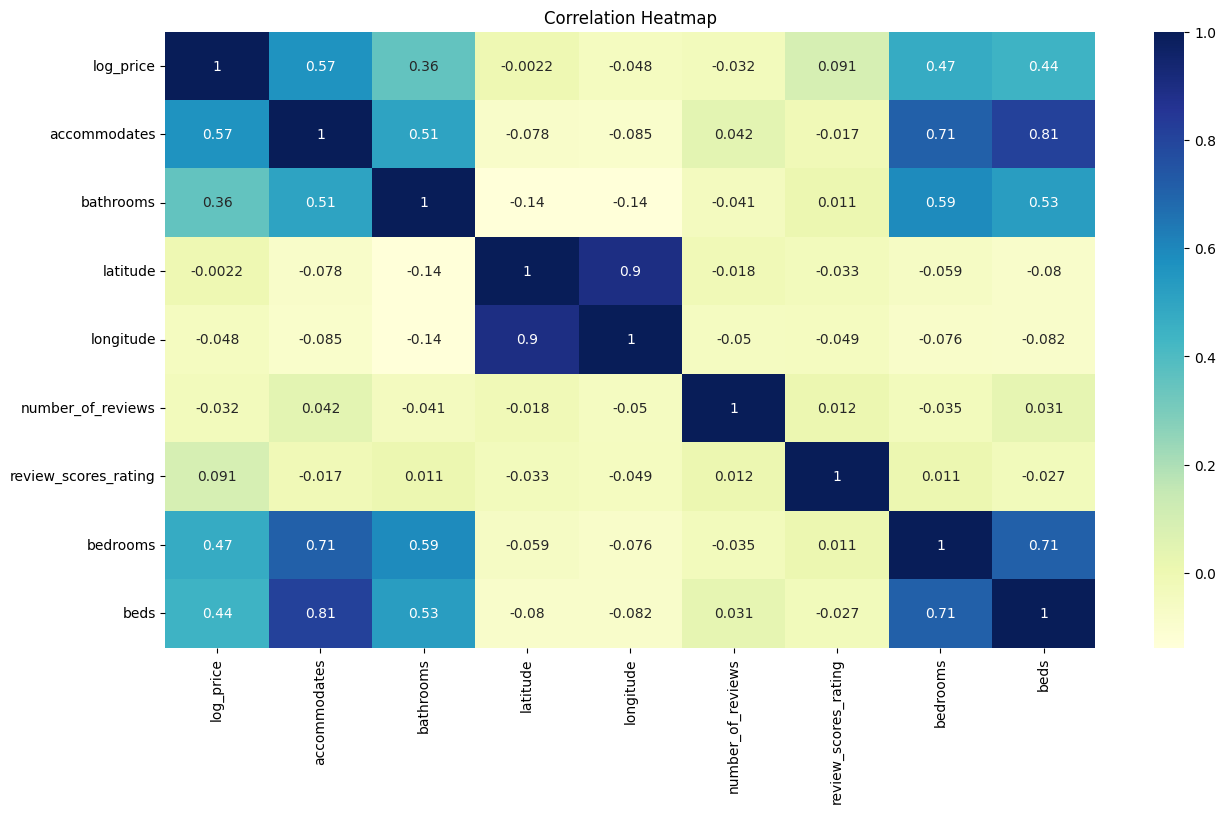

In [22]:
#we check correlation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=np.number).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 8))
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap")
plt.show()


<Axes: >

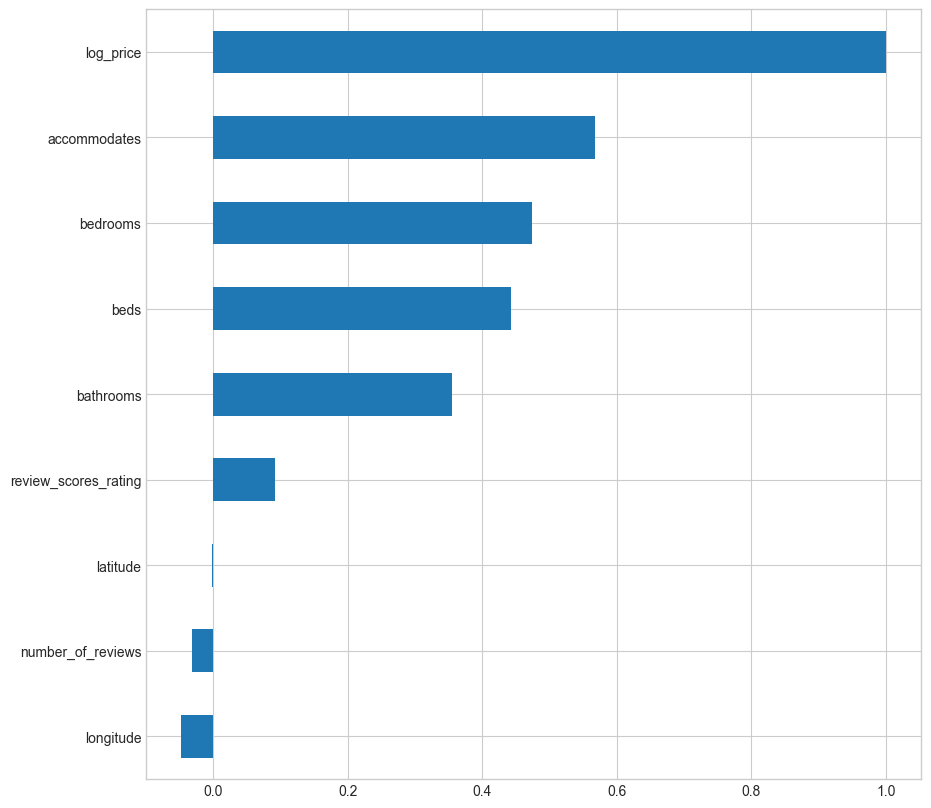

In [23]:

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(10,10))
df[numeric_columns].corr()["log_price"].sort_values().plot(kind="barh")

In [24]:
#we check the correlation between our target variable and other columns
target_correlation = df[numeric_columns].corr()['log_price'].abs().sort_values(ascending=False)
target_correlation

log_price               1.000000
accommodates            0.567574
bedrooms                0.473212
beds                    0.442153
bathrooms               0.355420
review_scores_rating    0.091219
longitude               0.047529
number_of_reviews       0.032470
latitude                0.002193
Name: log_price, dtype: float64

##### Most related numeric columns with target are:accommodates ,bedrooms ,bathrooms

# Handling Missing Values

In [25]:
df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 200  
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
first_review              15864
host_has_profile_pic      188  
host_identity_verified    188  
host_response_rate        18299
host_since                188  
instant_bookable          0    
last_review               15827
latitude                  0    
longitude                 0    
neighbourhood             6872 
number_of_reviews         0    
review_scores_rating      16722
thumbnail_url             8216 
zipcode                   966  
bedrooms                  91   
beds                      131  
dtype: int64

#### id, log_price ,property_type ,room_type,amenities,accommodates, bed_type, cancellation_policy ,cleaning_fee  

In [26]:
#They have no missing value

#### property_type -Feature enginerering kismina gidecek

In [27]:
"""# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Others' #???????????????????calistirmadim"""

"# Replacing categories that are types of houses or apartments\ndf.property_type.replace({\n    'Townhouse': 'House',\n    'Serviced apartment': 'Apartment',\n    'Loft': 'Apartment',\n    'Bungalow': 'House',\n    'Cottage': 'House',\n    'Villa': 'House',\n    'Tiny house': 'House',\n    'Earth house': 'House',\n    'Chalet': 'House'  \n    }, inplace=True)\n\n# Replacing other categories with 'other'\ndf.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Others' #???????????????????calistirmadim"

### bathrooms

In [28]:
df["bathrooms"].isnull().sum()

200

In [29]:
# There only 200 missing values. It makes no difference
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))

In [30]:
df["bathrooms"].isnull().sum()

0

#### city

In [31]:
df['city']

0        NYC
1        NYC
2        NYC
3        SF 
4        DC 
         .. 
74106    NYC
74107    LA 
74108    NYC
74109    NYC
74110    LA 
Name: city, Length: 74111, dtype: object

In [32]:
df['city'].isnull().sum()

0

### description

In [33]:
# df['description']

### first_review-last_review

In [34]:
df['first_review'].isnull().sum()

15864

In [35]:
df['first_review']

0        2016-06-18
1        2017-08-05
2        2017-04-30
3        NaN       
4        2015-05-12
            ...    
74106    NaN       
74107    2016-08-15
74108    2015-01-03
74109    NaN       
74110    2013-09-05
Name: first_review, Length: 74111, dtype: object

In [36]:
df['last_review'].isnull().sum()

15827

In [37]:
df['last_review']

0        2016-07-18
1        2017-09-23
2        2017-09-14
3        NaN       
4        2017-01-22
            ...    
74106    NaN       
74107    2017-04-15
74108    2017-09-10
74109    NaN       
74110    2017-04-30
Name: last_review, Length: 74111, dtype: object

In [38]:
 # Converting to datetime
df.first_review = pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)

In [39]:
#We calculated the percentage of blank values in the first_review and review_scores_rating columns
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'last_review': {round(100*df.last_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 21.4%
Null values in 'last_review': 21.4%
Null values in 'review_scores_rating': 22.6%


In [40]:
#We checked for the same null values in the first_review,last_review and review_scores_rating columns
first_review_column = df['first_review']
last_review_column = df['last_review']
review_scores_rating_column = df['review_scores_rating']

nan_in_first_review = first_review_column.isna()
nan_in_last_review = last_review_column.isna()
nan_in_review_scores_rating = review_scores_rating_column.isna()

nan_match = nan_in_first_review.all() == nan_in_first_review.all() == nan_in_review_scores_rating.all()

nan_match

True

About one-fifth of listings do not have a review written for them. This is an unnecessarily large proportion of the dataset, and dropping columns loses a lot of useful information - reviews are crucial in people's decision to book, and therefore price.

This is also a dataset ratio that is too large to simply replace with median/mean values, as it will drastically skew the distribution. Also, the missing values here aren't really the missing values, because it makes sense that they're NaNs - it tells us that these are new or unbooked and not yet reviewed lists. To make the resulting model work in such a way that it can predict the prices of any Airbnb listing, including brand new listings, it's actually useful to keep them in. Therefore, we will replace them with 00-00-00

### host_has_profile_pic - host_identity_verified - host_since

In [41]:
df['host_has_profile_pic'].isnull().sum()


188

In [42]:
df['host_identity_verified'].isnull().sum()

188

In [43]:
df['host_since'].isnull().sum()

188

In [44]:
#We check the nan values

print(f"Null values in 'host_has_profile_pic': {df['host_has_profile_pic'].isnull().sum()}")
print(f"Null values in 'host_identity_verified': {df['host_identity_verified'].isnull().sum()}")
print(f"Null values in 'host_since': {df['host_since'].isnull().sum()}")

Null values in 'host_has_profile_pic': 188
Null values in 'host_identity_verified': 188
Null values in 'host_since': 188


In [45]:
#We checked for the same null values in the host_has_profile_pic and host_identity_verified columns

nan_in_profile = df['host_has_profile_pic'].isna()
nan_in_id = df['host_identity_verified'].isna()
nan_in_host_since = df['host_since'].isna()

nan_match1 = nan_in_profile.all() == nan_in_id.all() == nan_in_host_since.all()

nan_match1

True

In [46]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

In [47]:
#We filled the nan values
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(0)
df['host_identity_verified'] = df['host_identity_verified'].fillna(0)
df['host_since'].fillna(df['host_since'].median(), inplace=True)

In [48]:
print(f"Null values in 'host_has_profile_pic': {df['host_has_profile_pic'].isnull().sum()}")
print(f"Null values in 'host_identity_verified': {df['host_identity_verified'].isnull().sum()}")
print(f"Null values in 'host_since': {df['host_since'].isnull().sum()}")

Null values in 'host_has_profile_pic': 0
Null values in 'host_identity_verified': 0
Null values in 'host_since': 0


### host_response_rate

In [49]:
df['host_response_rate']

0        NaN 
1        100%
2        100%
3        NaN 
4        100%
         ... 
74106    NaN 
74107    100%
74108    100%
74109    100%
74110    100%
Name: host_response_rate, Length: 74111, dtype: object

In [50]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')
df['host_response_rate']

0       NaN   
1        100.0
2        100.0
3       NaN   
4        100.0
         ...  
74106   NaN   
74107    100.0
74108    100.0
74109    100.0
74110    100.0
Name: host_response_rate, Length: 74111, dtype: float64

In [51]:
#We calculated the percentage of blank values in the host_response_rate 
print(f"Null values in 'host_response_rate': {round(100*df.host_response_rate.isna().sum()/len(df),1)}%")

Null values in 'host_response_rate': 24.7%


In [52]:
print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 94.0
Median host response rate: 100.0
Proportion of 100% host response rates: 77.5%


### instant_bookable

In [53]:
df['instant_bookable']

0        f
1        t
2        t
3        f
4        t
        ..
74106    f
74107    f
74108    t
74109    t
74110    f
Name: instant_bookable, Length: 74111, dtype: object

In [54]:
df['instant_bookable'].isnull().sum()

0

### 24-Number_of_reviews

In [55]:
df_origin['number_of_reviews'].isnull().sum()

0

### 25-review_scores_rating

In [56]:
df['review_scores_rating'].isnull().sum()

16722

In [57]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())

df['review_scores_rating'].isnull().sum()

0

### 26-Thumbnail_url

In [58]:
# this column has nothing interesting and inclde the photos of room. We are going to 
# take this column account if there is photo of not. So ether 0 or 1.
df['thumbnail_url'] = df['thumbnail_url'].fillna(0).apply(lambda x: 1 if x else 0)
df['thumbnail_url'].isnull().sum()

0

In [59]:
df['thumbnail_url'].value_counts()

thumbnail_url
1    65895
0    8216 
Name: count, dtype: int64

### 27-zipcode

In [60]:
df['zipcode'] = df['zipcode'].astype(str).str.rstrip('.0')

In [61]:
import re

pattern = r'[^0-9]'  # Regular expression pattern to match unwanted characters
df['zipcode'][df['zipcode'].str.contains(pattern, na=False)]
# There are unwanted characters in the zipcode column. Since we can fill the missing values with coordinates. ITs better to set them None to save time

26       nan
96       nan
189      nan
340         
401      nan
        ... 
73642    nan
73763    nan
73925    nan
74060    nan
74083    nan
Name: zipcode, Length: 987, dtype: object

In [62]:
df['zipcode'][df['zipcode'].str.contains(pattern, na=False)] = None

In [63]:
# TO fill 981 zipcode missing value
# There are coordinates of the given airbnb property. With these coordinates we find the zipcodes.
# This process takes sometime
# from uszipcode import SearchEngine
# from geopy.geocoders import Nominatim

# def get_zipcode(latitude, longitude):
 
#     geolocator = Nominatim(user_agent='my_app')
#     location = geolocator.reverse(f"{latitude}, {longitude}")
#     address = location.raw['address']
#     zipcode = address.get('postcode')
#     return zipcode

# for index, row in df.iterrows():
#     if pd.isnull(row['zipcode']):
#         zipcode = get_zipcode(row['latitude'], row['longitude'])
#         df.loc[index, 'zipcode'] = zipcode

In [64]:
df['zipcode'] = pd.read_csv('median_zipcode.csv')['zipcode'] # To save time. 

In [65]:
df['zipcode'].isnull().sum()

0

### 23-Neighbourhood

In [66]:
df['neighbourhood'].isnull().sum()
# Going to be filled with the help of coordinates

6872

In [67]:
from uszipcode import SearchEngine
from geopy.geocoders import Nominatim
def get_neighborhood(zipcode):
    search = SearchEngine()
    zipcode_data = search.by_zipcode(zipcode)
    if zipcode_data:
        neighborhood = zipcode_data.major_city
        if neighborhood:
            return neighborhood
        else:
            return "Neighborhood information not found."
    else:
        return "Zip code information not found."

# Iterate over your DataFrame and get neighborhood information for each zip code
for index, row in df.iterrows():
    if pd.isnull(df.loc[index, 'neighbourhood']) :
        zipcode = row['zipcode']
        neighborhood = get_neighborhood(zipcode)
        df.loc[index, 'neighbourhood'] = neighborhood

In [68]:
df['neighbourhood'].isnull().sum()

0

### 28-29-bed and bedrooms

In [69]:
df['beds'].isnull().sum()

131

In [70]:
# Since the missing value ratio to all data is relatively too small  we fill these parts wth the KNNImputer

from sklearn.impute import KNNImputer
# Create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)
# Fit the imputer on the data and transform it
#df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df['beds']= np.ceil(imputer.fit_transform(df[['beds']]))
df['bedrooms']= np.ceil(imputer.fit_transform(df[['bedrooms']]))

In [71]:
df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 0    
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
first_review              15864
host_has_profile_pic      0    
host_identity_verified    0    
host_response_rate        18299
host_since                0    
instant_bookable          0    
last_review               15827
latitude                  0    
longitude                 0    
neighbourhood             0    
number_of_reviews         0    
review_scores_rating      0    
thumbnail_url             0    
zipcode                   0    
bedrooms                  0    
beds                      0    
dtype: int64

In [72]:
def get_value_counts(df):
    """
    Returns the value counts of all categorical columns in the given df.
    """
    columns_values=['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'accommodates',
 'bathrooms',
 'host_has_profile_pic',
 'host_identity_verified',
 'instant_bookable',
 'bedrooms',
 'beds',
 'first_review',
 'neighbourhood'

 ]
    value_counts = {}
    for column in columns_values:
        value_counts[column] = df[column].value_counts()
        
    return value_counts

value_counts = get_value_counts(df)
for column, counts in value_counts.items():
    print(f"Column: {column}")
    print(counts)
    print(50*'--')

Column: property_type
property_type
Apartment             49003
House                 16511
Condominium           2658 
Townhouse             1692 
Loft                  1244 
Other                 607  
Guesthouse            498  
Bed & Breakfast       462  
Bungalow              366  
Villa                 179  
Dorm                  142  
Guest suite           123  
Camper/RV             94   
Timeshare             77   
Cabin                 72   
In-law                71   
Hostel                70   
Boutique hotel        69   
Boat                  65   
Serviced apartment    21   
Tent                  18   
Castle                13   
Vacation home         11   
Yurt                  9    
Hut                   8    
Treehouse             7    
Chalet                6    
Earth House           4    
Tipi                  3    
Train                 2    
Cave                  2    
Casa particular       1    
Parking Space         1    
Lighthouse            1    
Island      

In [73]:
# 10 Most expensve air bnb
top_reviewed_hosts= df.nlargest(10,'log_price').head(10)
top_reviewed_hosts

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
19210,7.600402,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Smoking allowed"",""Pets allowed"",Gym,Breakfast,""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}",10,4.5,Real Bed,strict,True,LA,...,NaT,34.101991,-118.418381,Bel Air/Beverly Crest,0,94.067365,0,9021,4.0,4.0
42672,7.600402,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Buzzer/wireless intercom"",Heating,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Fire extinguisher""}",2,1.0,Real Bed,moderate,True,NYC,...,2015-08-20,40.728233,-73.989335,East Village,20,85.000000,1,10003,1.0,1.0
55453,7.600402,Townhouse,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",""Pets allowed"",""Indoor fireplace"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,""Lock on bedroom door"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Private entrance""}",7,3.5,Real Bed,strict,True,NYC,...,2017-09-14,40.733003,-73.994126,Greenwich Village,1,80.000000,1,10003,4.0,4.0
60071,7.600402,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Shampoo,""24-hour check-in"",""Hair dryer"",Iron}",6,1.0,Real Bed,strict,False,DC,...,NaT,38.947020,-77.066699,Washington,0,94.067365,0,20008,1.0,2.0
72609,7.600402,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",""Pets allowed"",Breakfast,Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,""Lock on bedroom door"",""Hair dryer"",Iron,""Laptop friendly workspace"",""Private entrance""}",6,2.5,Real Bed,flexible,False,DC,...,NaT,38.904998,-76.986020,Trinidad,0,94.067365,0,20002,3.0,3.0
3063,7.598399,Villa,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}",16,7.5,Real Bed,strict,True,LA,...,NaT,34.123808,-118.628714,Topanga,0,94.067365,1,9029,8.0,11.0
9390,7.598399,House,Private room,"{""Wireless Internet"",""Free parking on premises"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Hangers}",2,1.0,Real Bed,strict,False,SF,...,NaT,37.787035,-122.493215,Sea Cliff,0,94.067365,1,94121,1.0,1.0
20722,7.598399,House,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Smoking allowed"",""Pets allowed"",""Hot tub"",""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Safety card"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}",16,5.5,Real Bed,strict,False,LA,...,NaT,34.069205,-118.389548,Beverly Hills,0,94.067365,0,90211,5.0,10.0
28420,7.598399,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kitchen,""Free p

# Visualition
### Value Counts

In [74]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)


def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

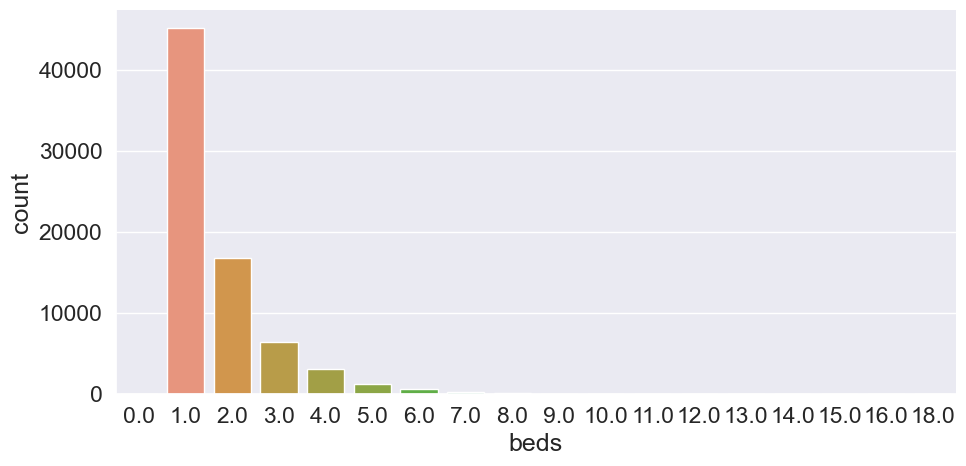

In [75]:
plot_catplot("beds", "count", 5, 2)

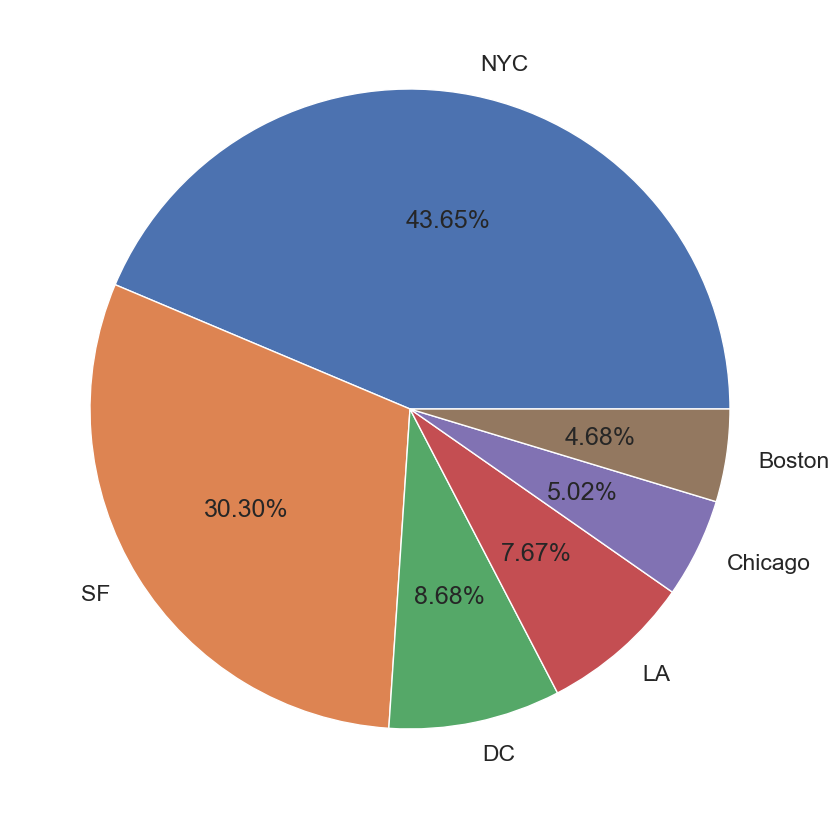

In [76]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

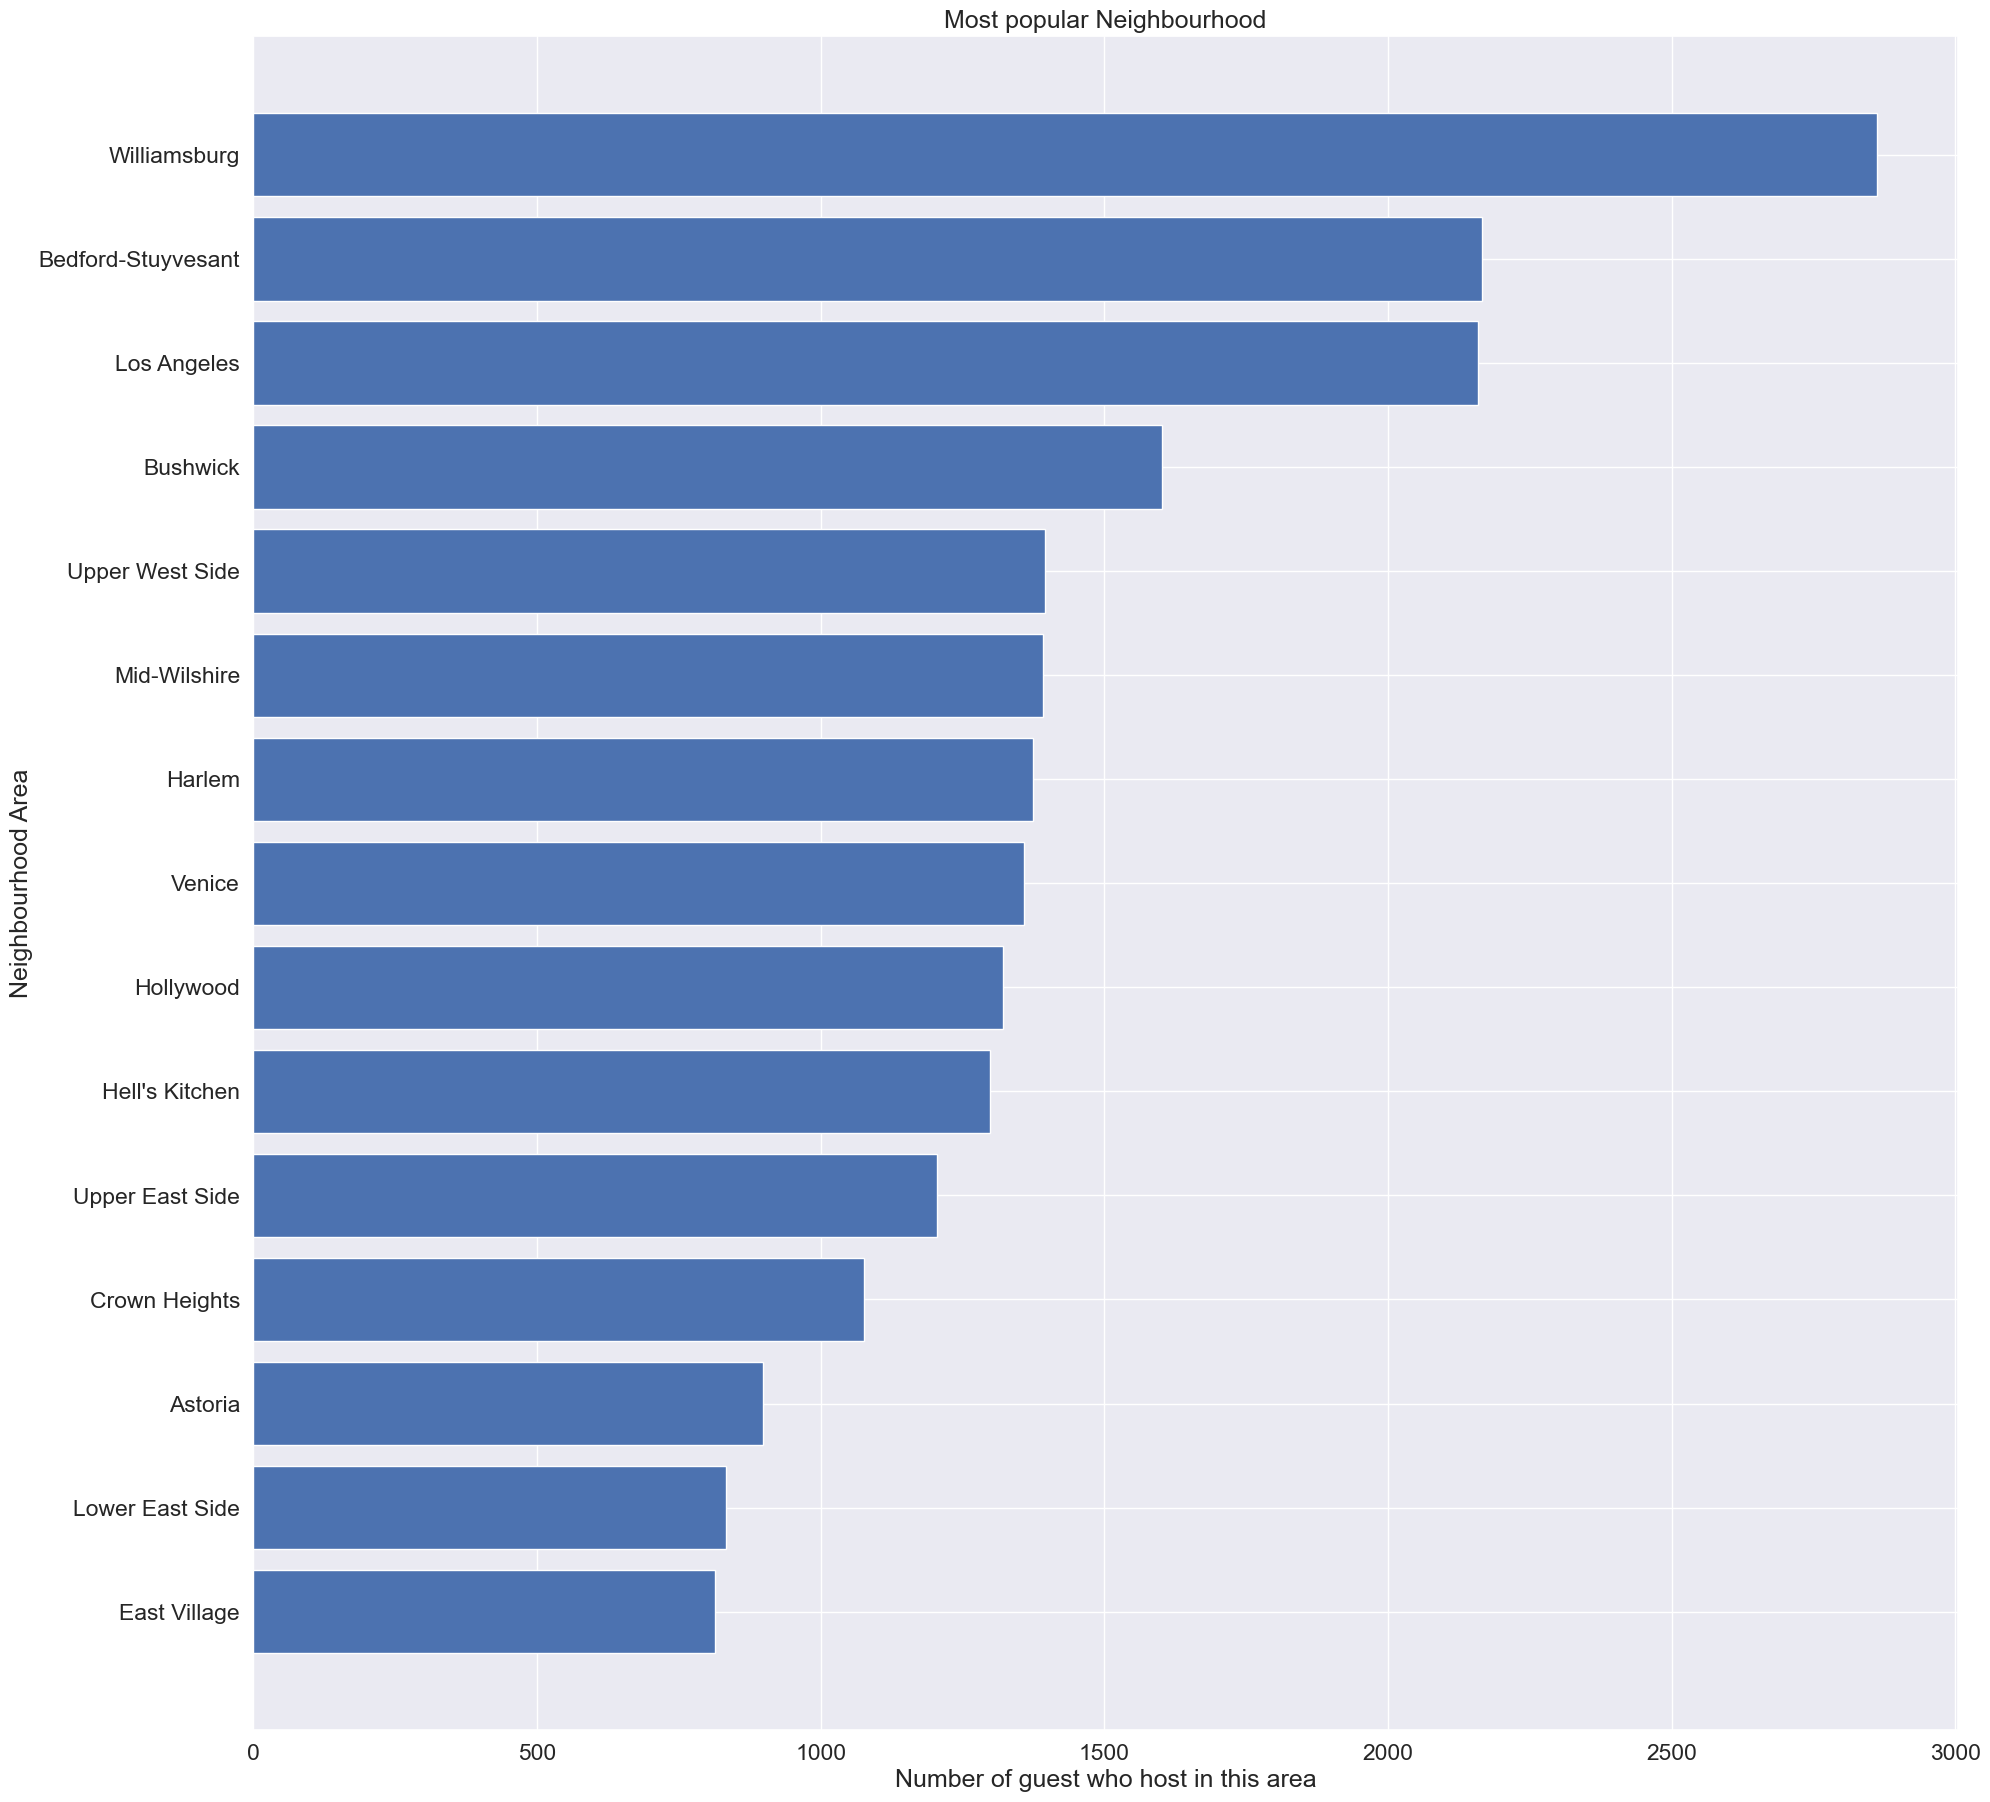

In [77]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

In [78]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values,rotation='vertical')
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [79]:
categoric_data = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categoric_data.append(column)
numeric_columns = df.select_dtypes(include=[np.number]).columns

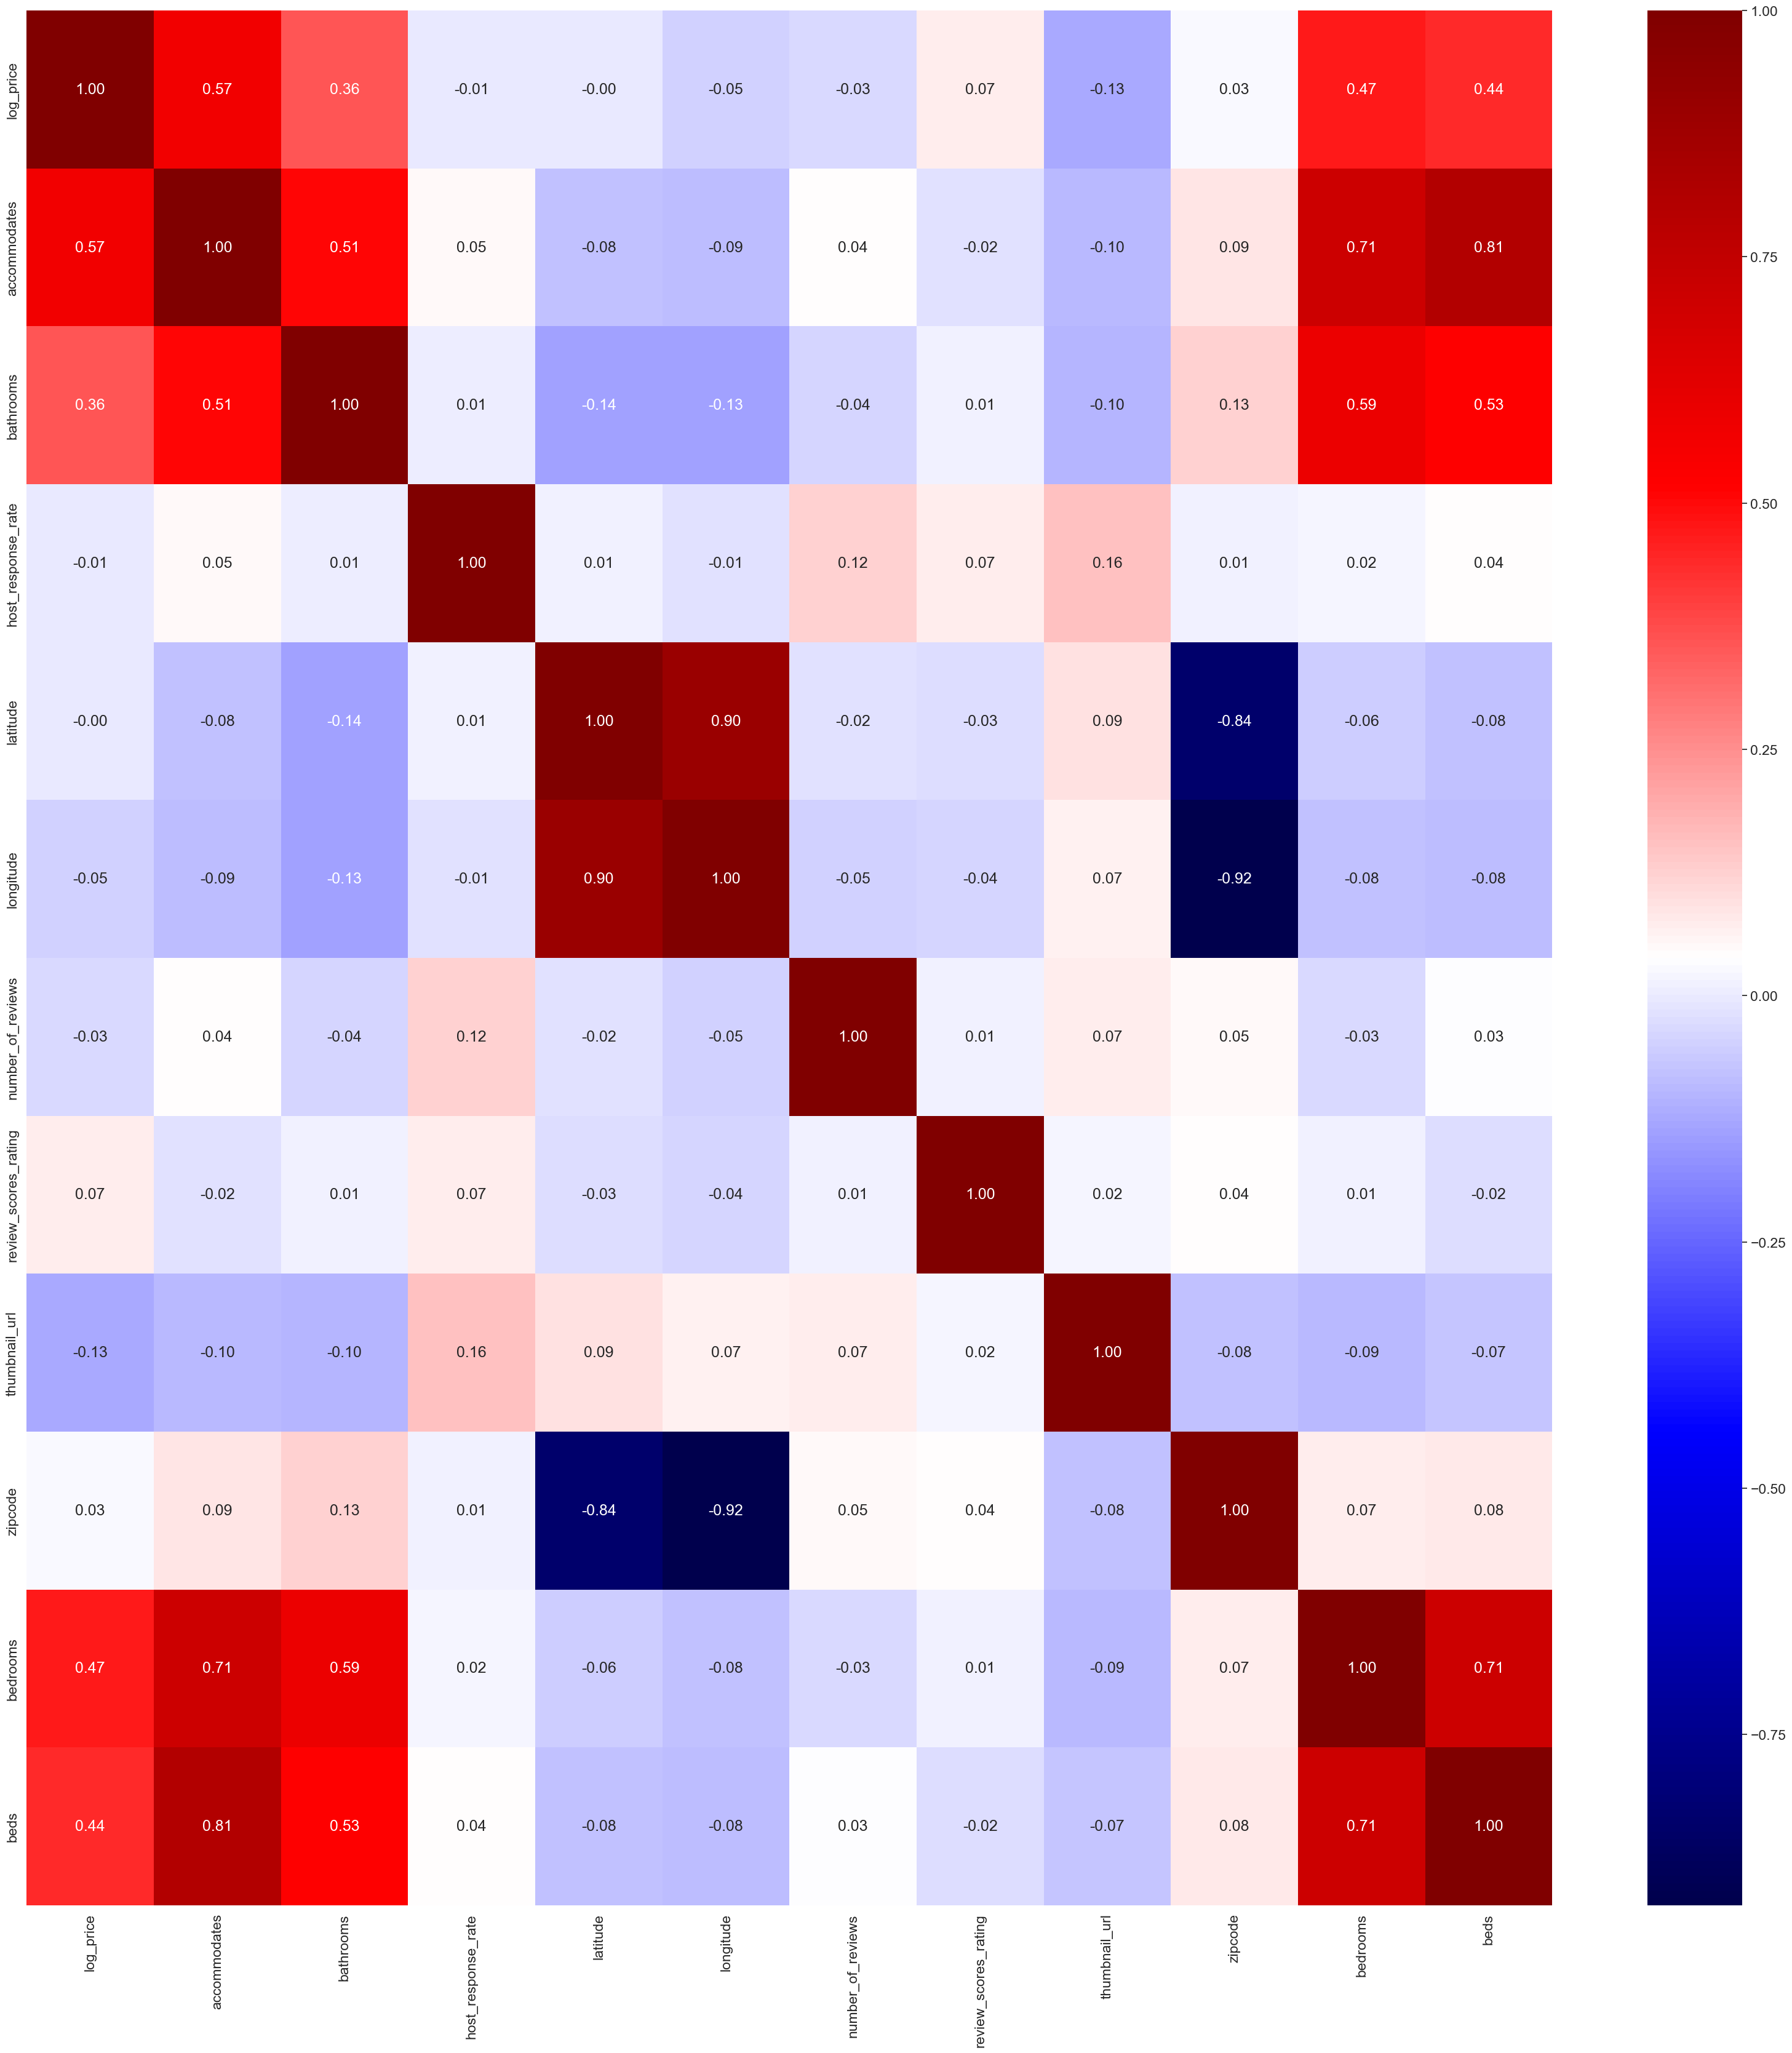

In [80]:
plt.figure(figsize = (40,40))
sns.heatmap(df[numeric_columns].corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [81]:
def plot_hist(df,variable):
    plt.figure(figsize=(9, 3))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)  # Rotate x-label vertically
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [82]:
grouped_data = df[["neighbourhood", "log_price"]].groupby("neighbourhood").mean()
value_counts = df["neighbourhood"].value_counts()

# Add value counts to the grouped data
grouped_data['Value Counts'] = value_counts
grouped_data.sort_values(by="Value Counts", ascending=False)[:10]

,log_price,Value Counts
neighbourhood,,
Williamsburg,4.740027,2862
Bedford-Stuyvesant,4.423185,2166
Los Angeles,4.607737,2158
Bushwick,4.274465,1601
Upper West Side,5.001347,1396
Mid-Wilshire,4.674082,1392
Harlem,4.636397,1374
Venice,5.118042,1358
Hollywood,4.688395,1321


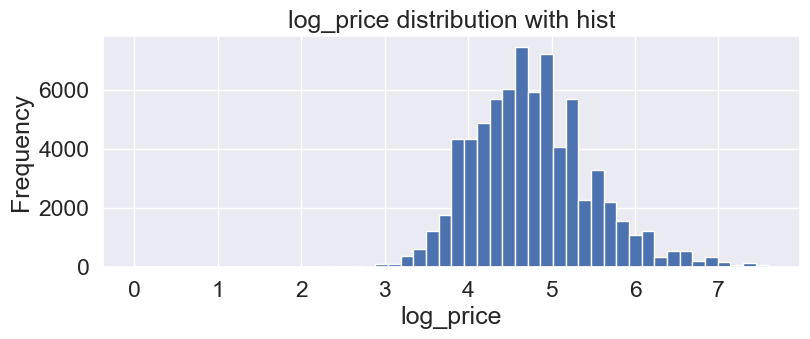

In [83]:

plot_hist(df,'log_price')

#### Relationship between log_price and categorical columns

In [84]:
def groupby_target(column):
    # Relationship between target and categorical columns
    grouped_data = df[[column, "log_price"]].groupby(column).mean().sort_values(by="log_price", ascending=False)
    value_counts = df[column].value_counts()

    # Add value counts to the grouped data
    grouped_data['Value Counts'] = value_counts

    # Print the updated grouped data
    print(grouped_data)
   
    print(50*'--')

In [85]:
for i in categoric_data:
    groupby_target(i)

                    log_price  Value Counts
property_type                              
Timeshare           5.602600   77          
Lighthouse          5.521461   1           
Vacation home       5.420951   11          
Castle              5.368424   13          
Earth House         5.285391   4           
Tipi                5.246118   3           
Train               5.204399   2           
Boat                5.200865   65          
Serviced apartment  5.147467   21          
Villa               5.112427   179         
Boutique hotel      5.083352   69          
Condominium         5.026539   2658        
Island              5.010635   1           
Loft                5.007919   1244        
Other               4.946367   607         
Yurt                4.944360   9           
Cave                4.909373   2           
Treehouse           4.845520   7           
Townhouse           4.833539   1692        
In-law              4.816649   71          
House               4.797114   1

#### -Apartmant and house have more impact on price and they are most frequent

#### -Although the price of Entire home/apt are over the mean, they are most preferred.

#### -Bed type consisst of 72000 real bed. We consider this as realbad and others.

#### -Cancellation_policy. As the flexibity increases thhe price also increase. Expensive houses suffer more when the booking is cancelled. Therefore their policies are strickter. Since the extereme values are so few , we will add those in to strict.

#### -cleaning_fee has affect on price. This is not included in price. So extra. People may think it would be cleaner if there is cleaning fee.

#### -Cities have little affet on price ????

#### - accommodates has large affect on price. We will handle outliears.

#### -  bathrooms . Outliears need to be handled ????

#### - host_has_profile_pic this column consist of only 226 false value. So has almost no affect on price

#### - host_identity_verified has no affect. 

#### - Has almost no affexct on price. But has affect on preferebility

#### - bedrooms has large affect on price. Outliears need to be handled

#### - beds has large affect on price. Outliears need to be handled

#### - first_review and last_review. From last review to now, between first and last review , year of first review




In [86]:
def catplot(column):
    if len(df[column].unique()) <= 20:
        g = sns.catplot(x=column, y="log_price", data=df, kind="bar", height=8)
        g.set_ylabels("log_price")
        plt.show()

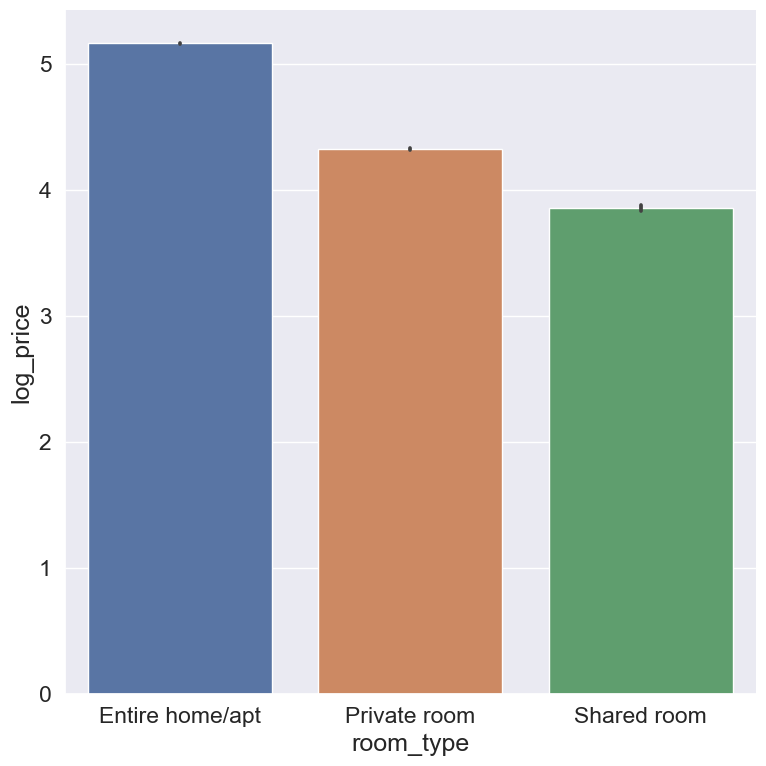

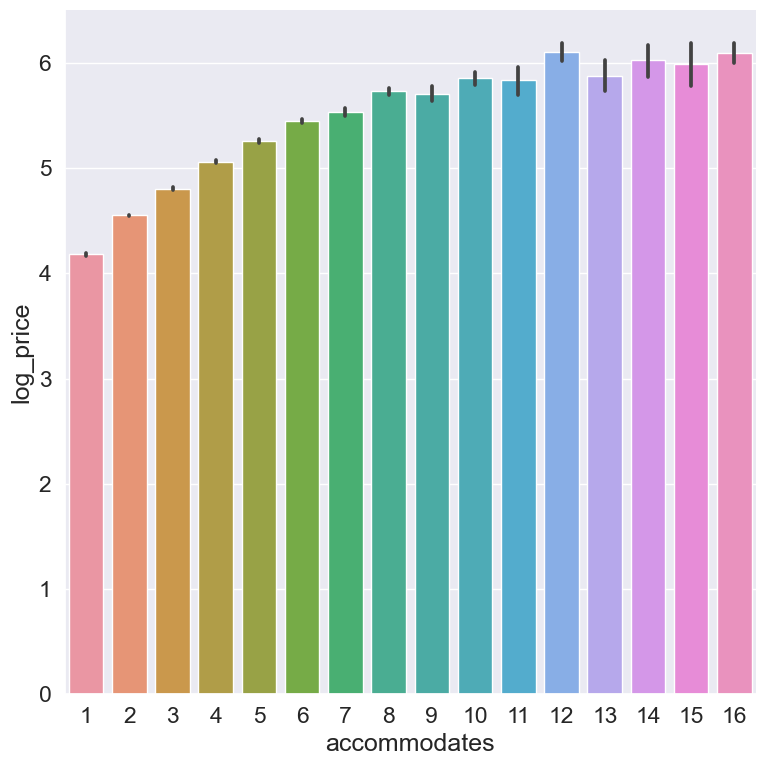

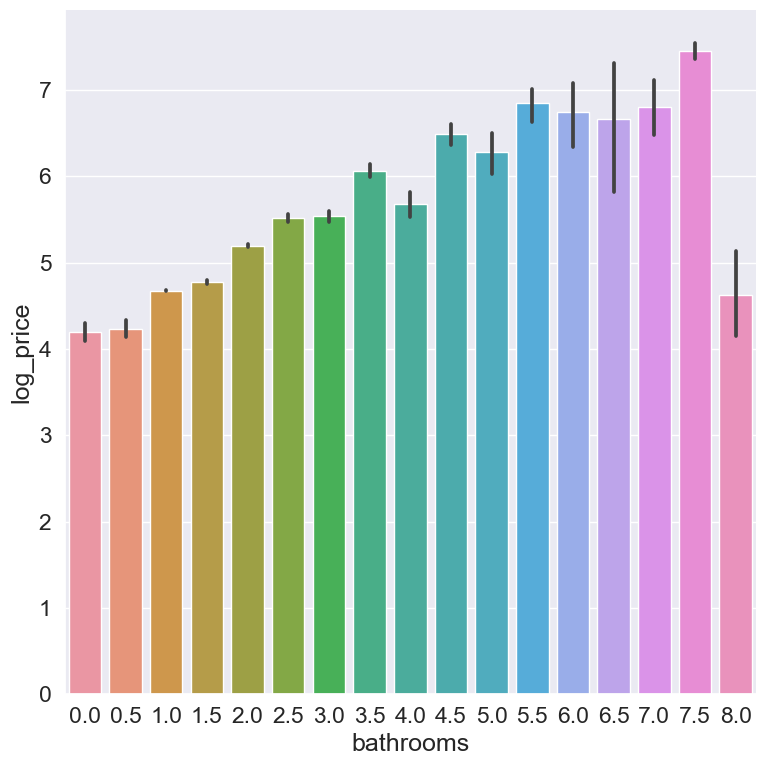

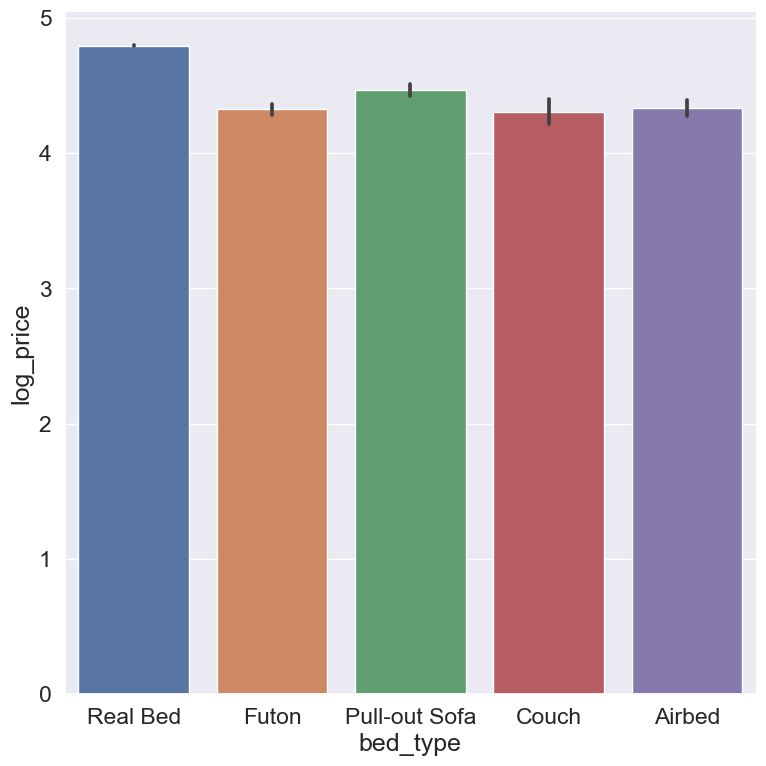

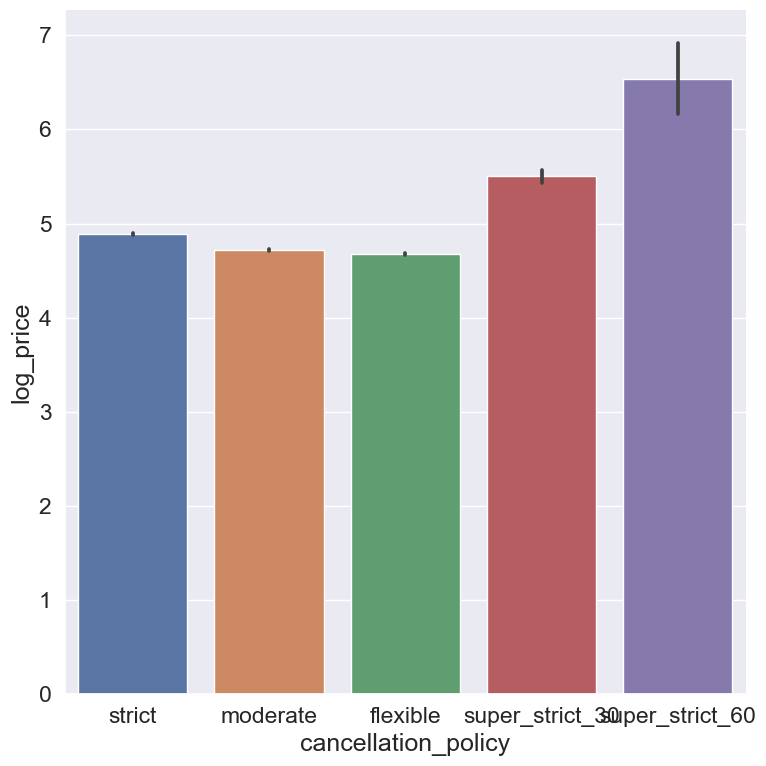

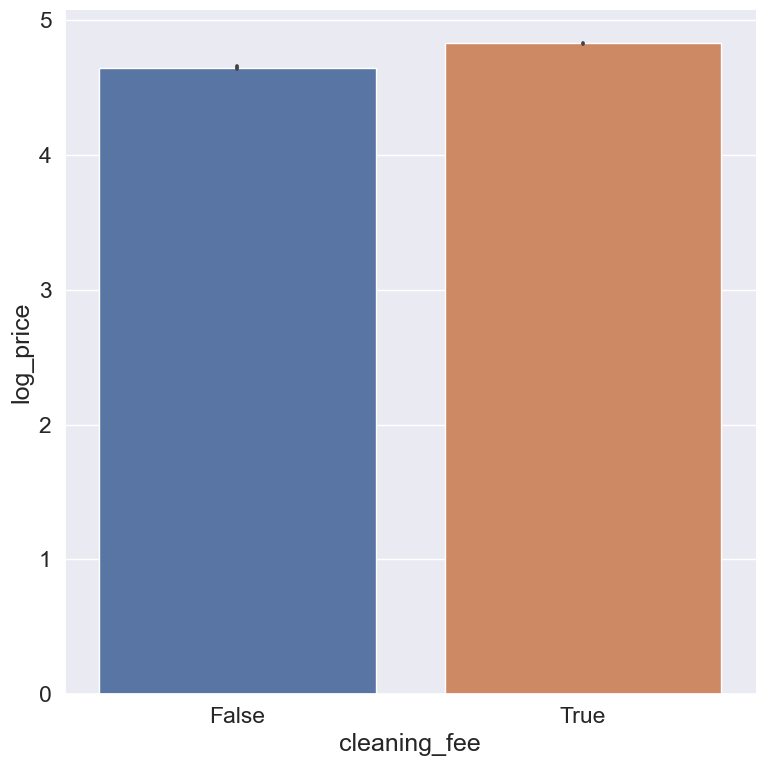

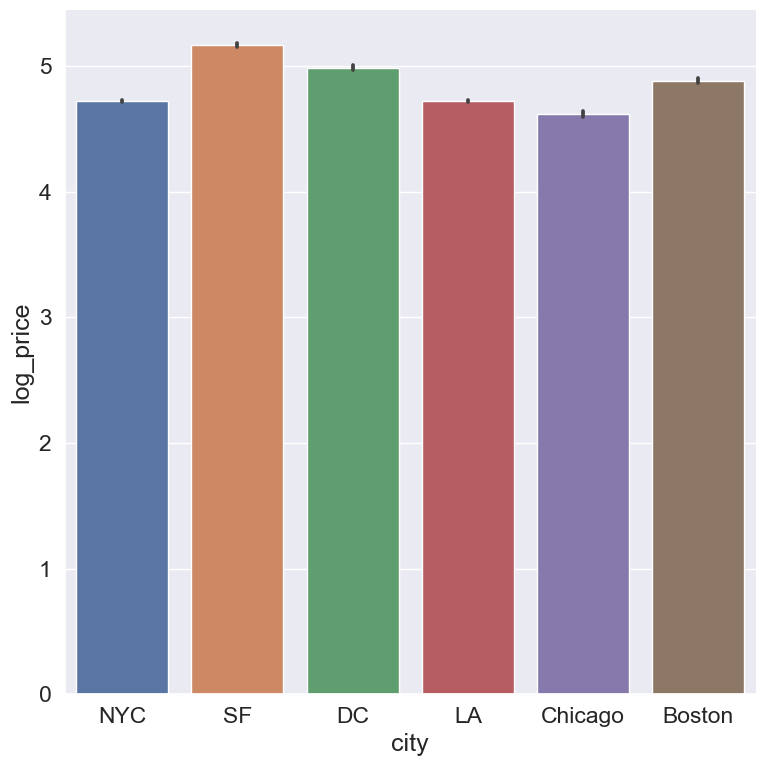

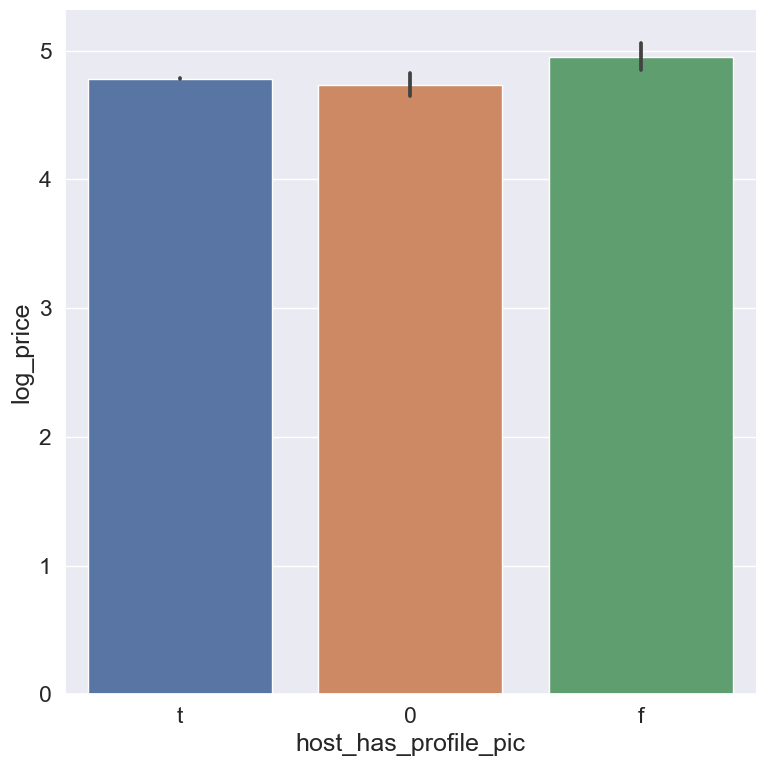

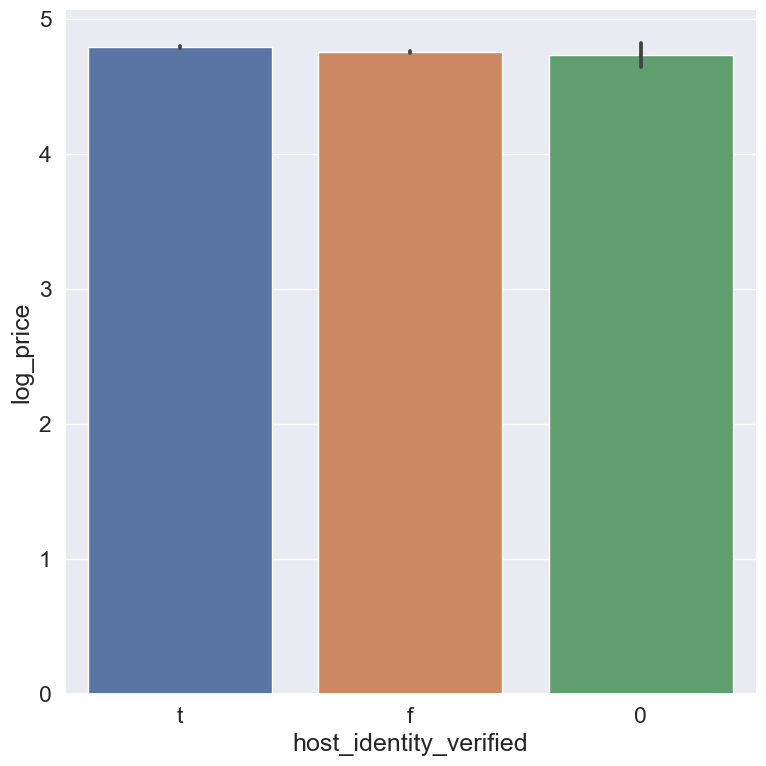

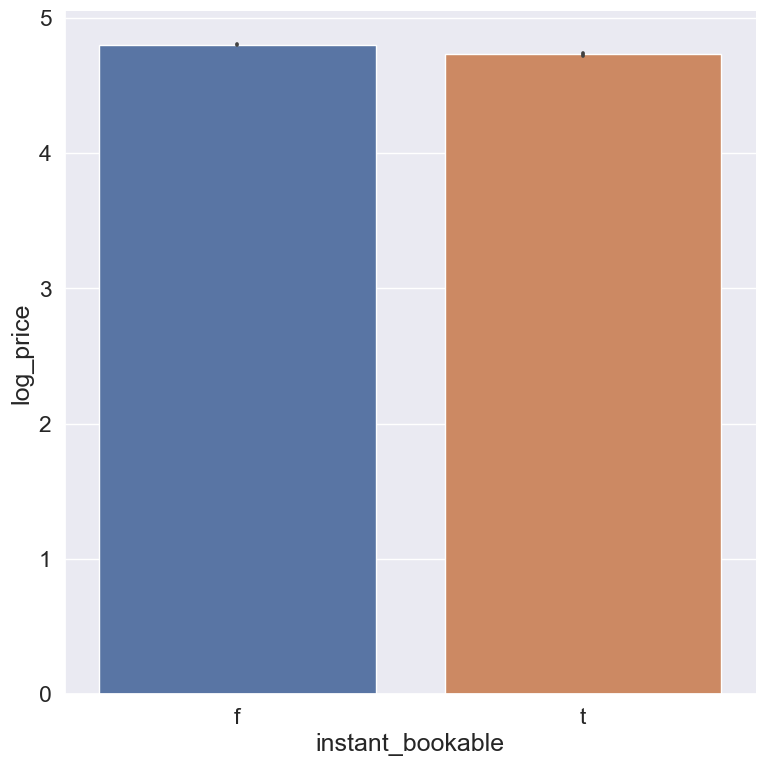

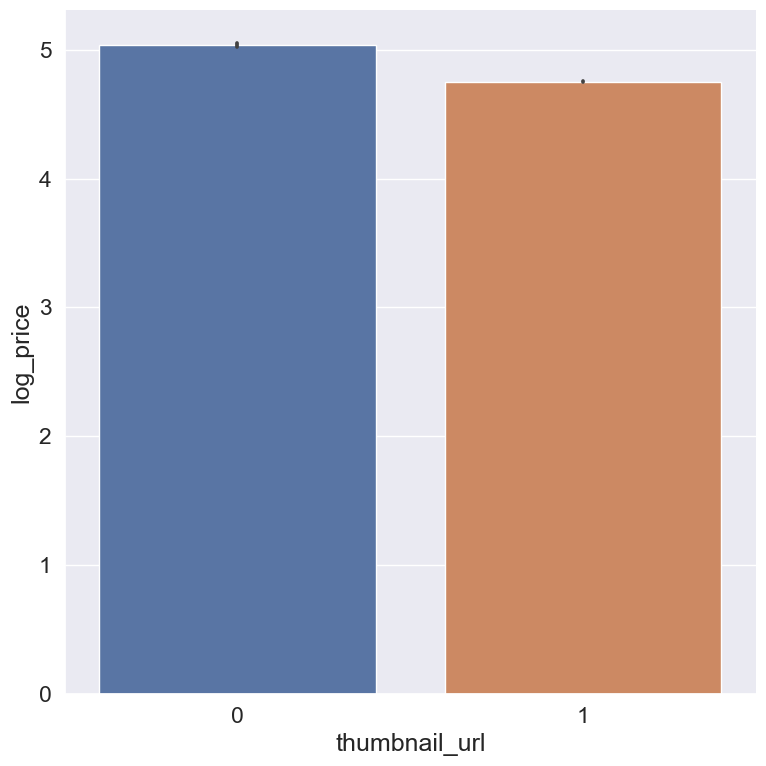

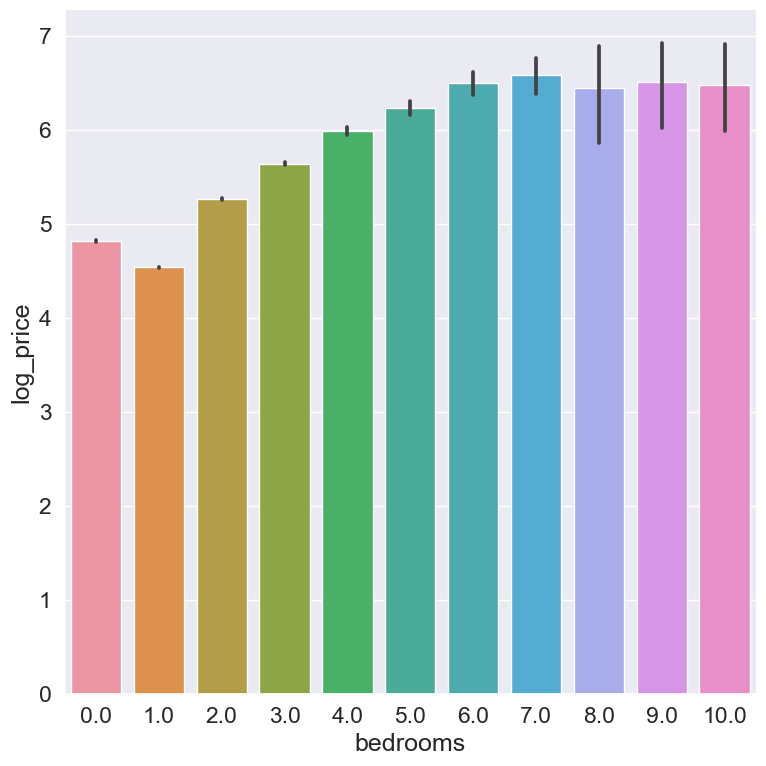

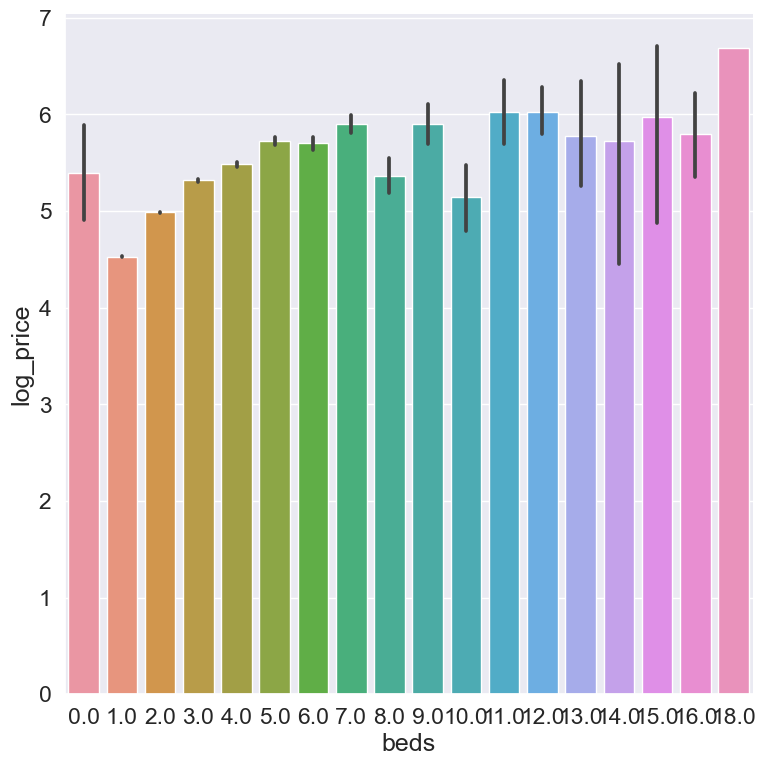

In [87]:
for i in df.columns :
    catplot(i)

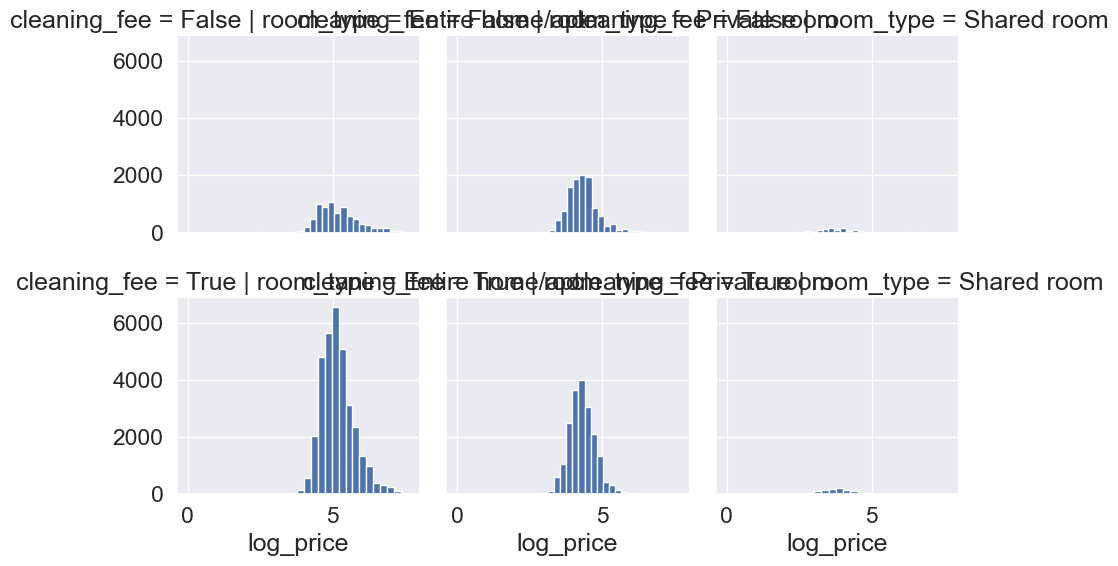

In [88]:
# Duzen yapilacak - unique degerleri az olanlarla denenecek
g = sns.FacetGrid(df, col = "room_type", row = "cleaning_fee")
g.map(plt.hist, "log_price", bins = 25)

plt.show()

#### -neighbourhood. Williamsburg is most populer. Its open to further calculations

In [89]:
def box_plot_target(df,column):
    sns.boxplot(x=column, y="log_price", data=df)
    plt.xlabel(f"{column}")
    plt.ylabel("Log Price")
    plt.title(f"Distribution of Log Price by {column}")
    plt.show()

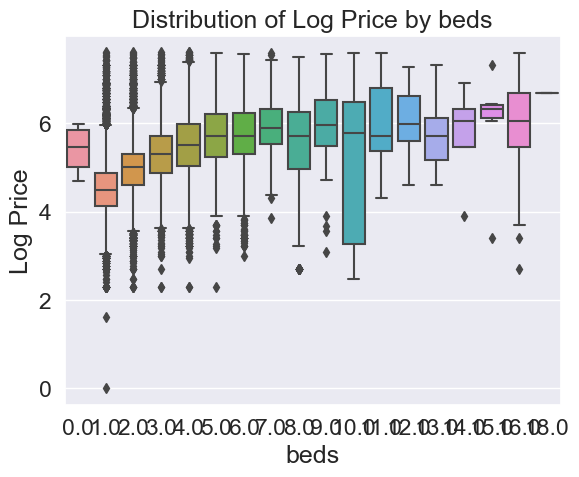

In [90]:
box_plot_target(df,'beds')

# OUTLIER HANDLE

In [91]:
def show_outliers(df,column):
    '''
    Visialize outliers of given column
    '''
    plt.figure(figsize=(8, 6))
    plt.boxplot(x=df[column],patch_artist=True ,boxprops=dict(facecolor='lightblue', linewidth=2, edgecolor='black'))
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.title('Outliers Plot of '+ column)
    plt.show()

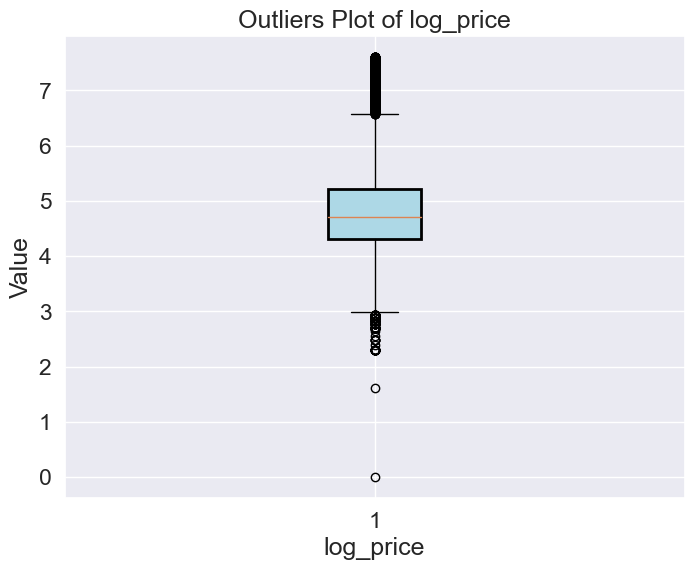

In [92]:
#check outliers
show_outliers(df,'log_price')

#### First method of handling outliers with IQR and quantiles

In [93]:
def outliers_iqr(df,column):
    '''
    first method of handling outliers with IQR and quantiles
    '''
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    df_clean = df[(df[column] > (Q1 - threshold * IQR)) & (df[column] < (Q3 + threshold * IQR))]
    print("max value is : ",df_clean[column].max())
    print("min value is : ",df_clean[column].min())
    print((df.shape[0]-df_clean.shape[0])," rows removed in total")
    
    return df_clean

In [94]:
df_iqr = outliers_iqr(df,"log_price")

max value is :  6.572282542694008
min value is :  2.995732273553992
1532  rows removed in total


In [95]:
df_iqr = outliers_iqr(df_iqr,"number_of_reviews")  # This method deleted too many rows. Such lost cant be accepted.

max value is :  58
min value is :  0
7814  rows removed in total


In [96]:
# lets the diffreence
def compare_dist(df,df1,column):
    plot_hist(df,column)
    plot_hist(df1,column)


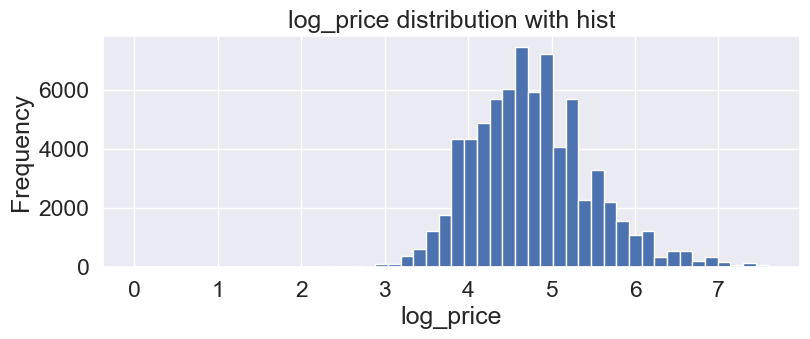

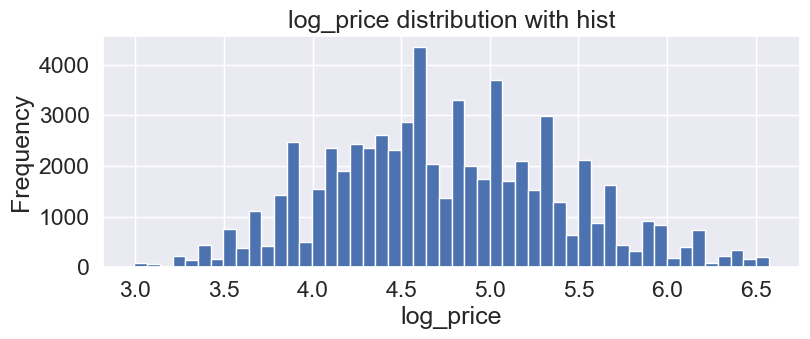

In [97]:
compare_dist(df,df_iqr,"log_price") # IQR method before and after

#### Second method of handling outliers by determining min and max value via quantiles

In [98]:
def remove_outliers(df, column, q1, q2):
    '''
    Second method of handling outliers with determining 'min' and 'max' value
    '''
    min_val = df[column].quantile(q1)
    max_val = df[column].quantile(q2)
    
    df_cleaned = df.loc[(df[column] >= min_val) & (df[column] <= max_val)].copy()
    print("max value is : ",df_cleaned[column].max())
    print("min value is : ",df_cleaned[column].min())
    print((df.shape[0]-df_cleaned.shape[0])," rows removed")
    df_cleaned.reset_index(drop=True, inplace=True)
    return df_cleaned




In [99]:
cleaned_df = remove_outliers(df, 'log_price', 0.001, 0.998)

max value is :  7.3132203870903005
min value is :  2.7080502011022096
137  rows removed


In [100]:
cleaned_df =remove_outliers(cleaned_df,"number_of_reviews",0.01, 0.9997)

max value is :  388
min value is :  0
23  rows removed


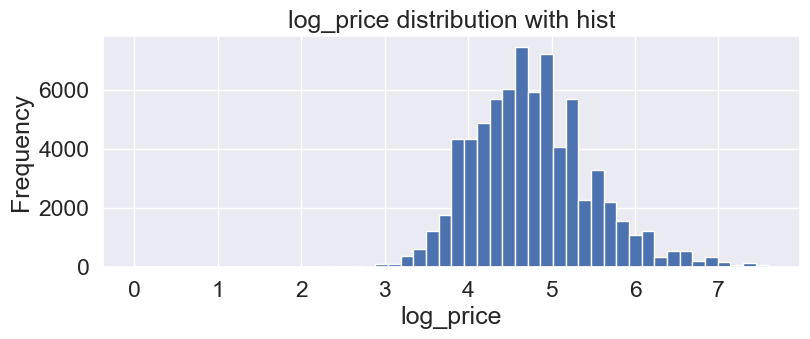

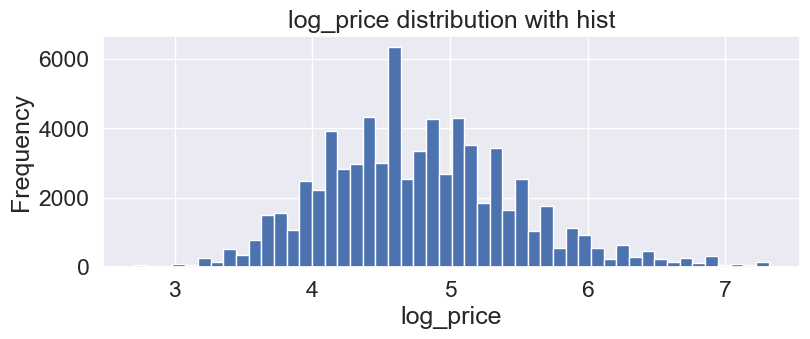

In [101]:
compare_dist(df,cleaned_df,"log_price") # min_max method before and after

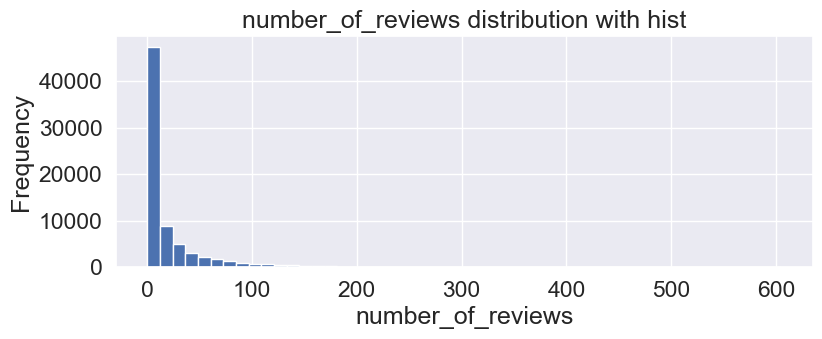

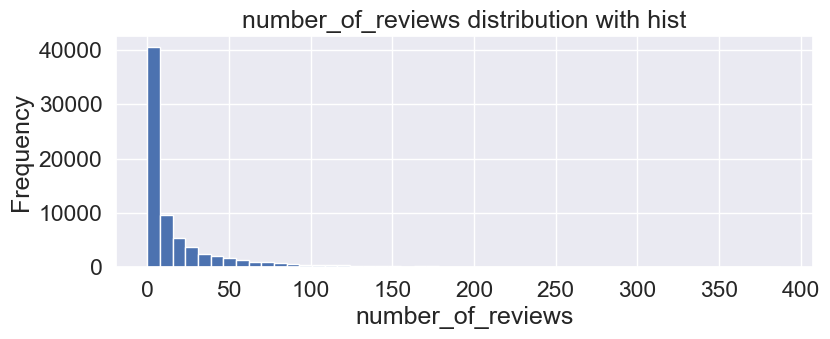

In [102]:
compare_dist(df,cleaned_df,"number_of_reviews") # min_max method before and after

In [103]:
def compare_outliers(df,df1,column):
    '''
    Compares before handling and after handling outliers
    '''
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()

    plt.boxplot(x=df1[column],patch_artist=True ,boxprops=dict(facecolor='lightblue', linewidth=2, edgecolor='black'))
    # plt.boxplot(x=cleaned_df["log_price"])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel(column)
    plt.ylabel("Values")
    plt.show()

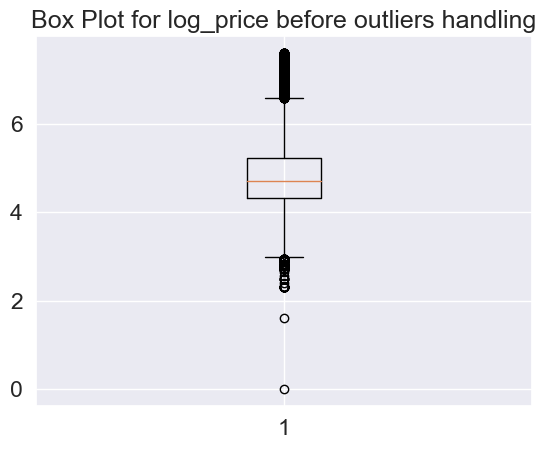

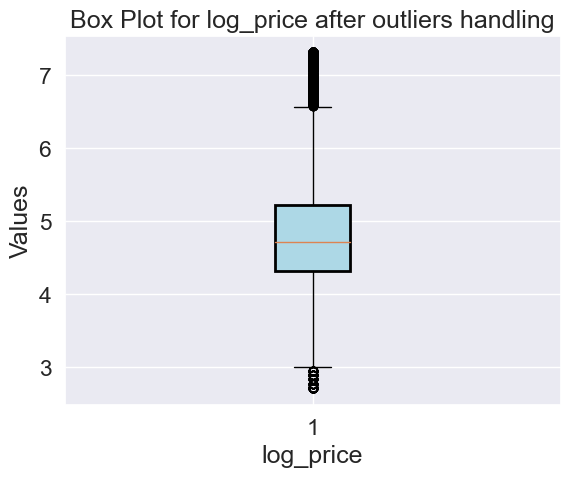

In [104]:
compare_outliers(df,cleaned_df,"log_price")  # min_max method

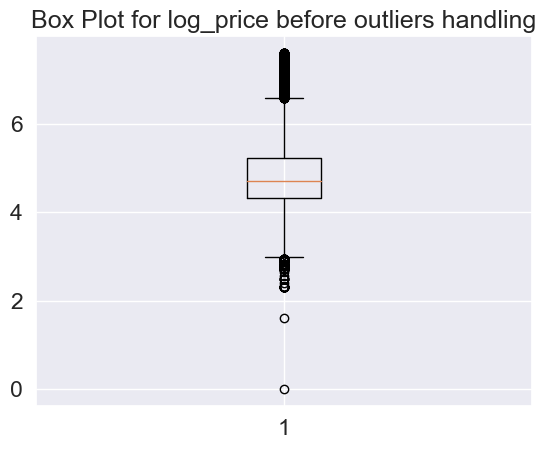

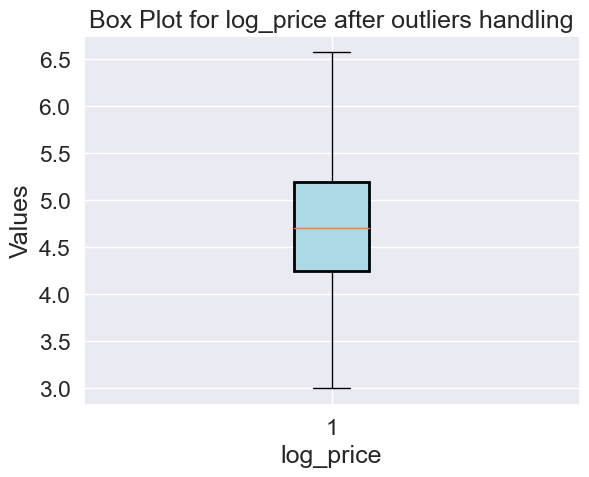

In [105]:
compare_outliers(df,df_iqr,"log_price")  # IQR method

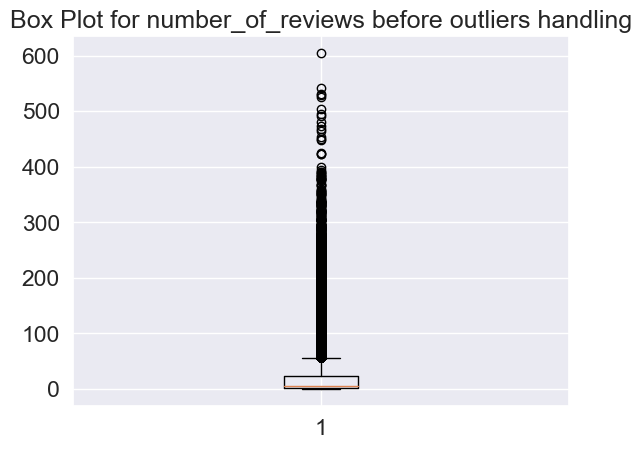

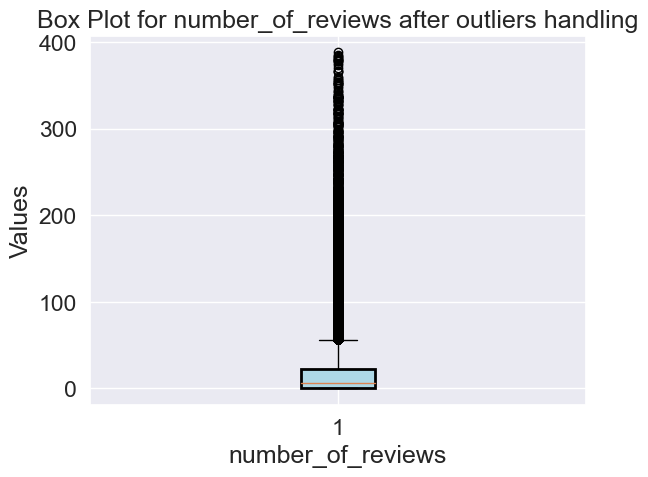

In [106]:
compare_outliers(df,cleaned_df,"number_of_reviews")  # min_max method

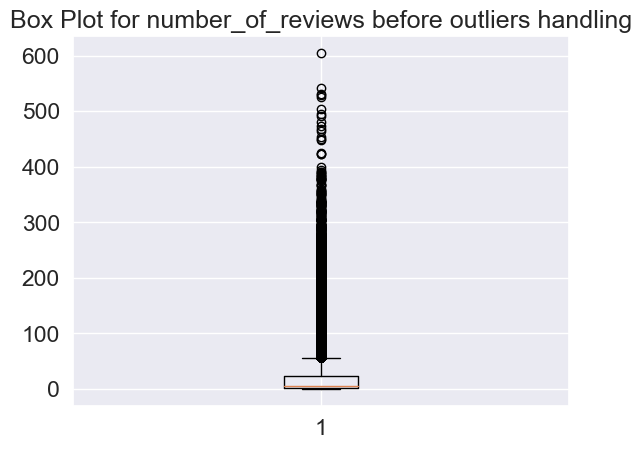

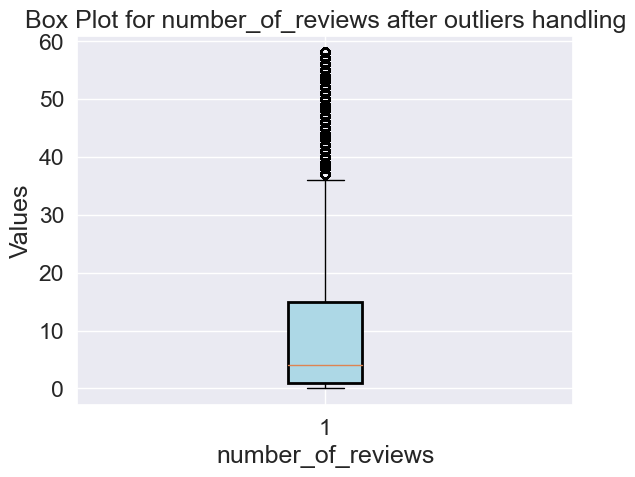

In [107]:
compare_outliers(df,df_iqr,"number_of_reviews") # IQR method

# FEATURE ENGINEERING

In [108]:
df.isnull().sum()

log_price                 0    
property_type             0    
room_type                 0    
amenities                 0    
accommodates              0    
bathrooms                 0    
bed_type                  0    
cancellation_policy       0    
cleaning_fee              0    
city                      0    
first_review              15864
host_has_profile_pic      0    
host_identity_verified    0    
host_response_rate        18299
host_since                0    
instant_bookable          0    
last_review               15827
latitude                  0    
longitude                 0    
neighbourhood             0    
number_of_reviews         0    
review_scores_rating      0    
thumbnail_url             0    
zipcode                   0    
bedrooms                  0    
beds                      0    
dtype: int64

In [109]:
df['property_type'].value_counts()

property_type
Apartment             49003
House                 16511
Condominium           2658 
Townhouse             1692 
Loft                  1244 
Other                 607  
Guesthouse            498  
Bed & Breakfast       462  
Bungalow              366  
Villa                 179  
Dorm                  142  
Guest suite           123  
Camper/RV             94   
Timeshare             77   
Cabin                 72   
In-law                71   
Hostel                70   
Boutique hotel        69   
Boat                  65   
Serviced apartment    21   
Tent                  18   
Castle                13   
Vacation home         11   
Yurt                  9    
Hut                   8    
Treehouse             7    
Chalet                6    
Earth House           4    
Tipi                  3    
Train                 2    
Cave                  2    
Casa particular       1    
Parking Space         1    
Lighthouse            1    
Island                1    
Name: 

In [110]:
# Replacing other categories with 'other'
import pandas as pd


# Property_type sütununda value count'u 25'ten küçük olanları "other" olarak güncelleyin
property_type_counts = df['property_type'].value_counts()
property_type_counts_less_than_25 = property_type_counts[property_type_counts < 25]
df.loc[df['property_type'].isin(property_type_counts_less_than_25.index), 'property_type'] = 'Other'

df['property_type'].value_counts()



property_type
Apartment          49003
House              16511
Condominium        2658 
Townhouse          1692 
Loft               1244 
Other              715  
Guesthouse         498  
Bed & Breakfast    462  
Bungalow           366  
Villa              179  
Dorm               142  
Guest suite        123  
Camper/RV          94   
Timeshare          77   
Cabin              72   
In-law             71   
Hostel             70   
Boutique hotel     69   
Boat               65   
Name: count, dtype: int64

In [111]:
 prop_corr = df[['property_type', "log_price"]].groupby('property_type').mean().sort_values(by="log_price", ascending=False)
 prop_corr['value']=df['property_type'].value_counts()
 prop_corr

,log_price,value
property_type,,
Timeshare,5.602600,77
Boat,5.200865,65
Villa,5.112427,179
Boutique hotel,5.083352,69
Condominium,5.026539,2658
Loft,5.007919,1244
Other,4.938913,715
Townhouse,4.833539,1692
In-law,4.816649,71


## we will make for property type get dummies and than delete some unneccesery colums(<10)

## property_type

In [112]:
df = pd.get_dummies(df,columns=["property_type"])

In [113]:
df.columns

Index(['log_price', 'room_type', 'amenities', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Boutique hotel',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Condominium',
       'property_type_Dorm', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_In-law', 'property_type_Loft',
       'property_type_Other', 'property_type_Timeshare',
       'property_type_Townhouse', 'property_type_Villa'],
    

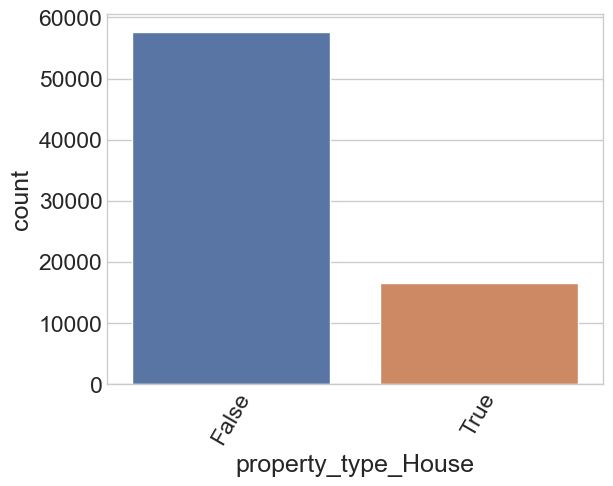

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

sns.countplot(x="property_type_House", data =df)
plt.xticks(rotation = 60)
plt.show()

## accomodates

In [115]:
# df = pd.get_dummies(df,columns=["accommodates"])

## cancellation_policy

In [116]:
import pandas as pd


df = pd.get_dummies(df,columns=["cancellation_policy"])

In [117]:
df['cancellation_policy_super_strict_60'].dtype

dtype('bool')

## cleaning_fee

In [118]:
df['cleaning_fee'] = df['cleaning_fee'].astype(int)



In [119]:
df['cleaning_fee'].value_counts()

cleaning_fee
1    54403
0    19708
Name: count, dtype: int64

## bed_type

In [120]:
df = pd.get_dummies(df,columns=["bed_type"])


## room_type

In [121]:
df['room_type'].value_counts()

room_type
Entire home/apt    41310
Private room       30638
Shared room        2163 
Name: count, dtype: int64

In [122]:

df = pd.get_dummies(df, columns=["room_type"])


## bathrooms

In [123]:
df['bathrooms'].value_counts()

bathrooms
1.0    58299
2.0    7936 
1.5    3801 
2.5    1567 
3.0    1066 
3.5    429  
4.0    286  
0.5    209  
0.0    198  
4.5    116  
5.0    72   
8.0    41   
5.5    39   
6.0    24   
6.5    12   
7.0    10   
7.5    6    
Name: count, dtype: int64

In [124]:
# df = pd.get_dummies(df, columns=["bathrooms"])



## amenities

In [125]:
import re
amenities_set = set()
for amenitie in df['amenities']:
    amenitie_set = set(re.sub(r'(\"|\{|\})', '', amenitie).split(','))
    for piece in amenitie_set:
        if "translation missing" not in piece and piece:
            amenities_set.add(piece.strip())
            
amenities_set

{'24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bath towel',
 'Bathtub',
 'Bathtub with shower chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Body soap',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm matress',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower & toilet',
 'Flat',
 'Flat smooth pathway to front do

In [126]:

amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bath towel',
 'Bathtub',
 'Bathtub with shower chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Body soap',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm matress',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower & toilet',
 'Flat',
 'Flat smooth pathway to fro

In [127]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens|'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)|Pets live on this property'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

In [128]:
df.iloc[:,87:].columns

Index([], dtype='object')

In [129]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,87:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,87:].columns:
    if (df[col].sum() < len(df)/50) | (df[col].sum() > len(df)/1.02):
        infrequent_amenities.append(col)

In [130]:
infrequent_amenities

[]

In [131]:
for i in df.iloc[:,87:].columns : 
    print(df[i].value_counts())

In [132]:
import matplotlib.pyplot as plt
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()


In [133]:
for col in df.iloc[:,87:].columns:
    catplot(col)

In [134]:
import seaborn as sns
for col in df[infrequent_amenities]:
    catplot(col)
    ### assgida log price ile cikarmayi dusundugumuz sutunlarin iliskisi incelendi  kesin cikaracagimiz 3 sutun:bed_linens self_check_in ve nature and viewsdigerleri yoruma acik sorulmali!!!!!

In [135]:
del df['amenities']
del df['self_check_in']
del df['bed_linen']
del df['nature_and_views']
#eger infruence_amenities icindeki hepsi silincekse infruencei de sil

## city

In [136]:
df['city']

0        NYC
1        NYC
2        NYC
3        SF 
4        DC 
         .. 
74106    NYC
74107    LA 
74108    NYC
74109    NYC
74110    LA 
Name: city, Length: 74111, dtype: object

In [137]:
df = pd.concat([df, pd.get_dummies(df['city'])], axis=1)
df.head()


,log_price,accommodates,bathrooms,cleaning_fee,city,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,...,secure,smoking_allowed,accessible,event_suitable,Boston,Chicago,DC,LA,NYC,SF
0,5.010635,3,1.0,1,NYC,2016-06-18,t,t,NaN,2012-03-26,...,NaN,NaN,NaN,NaN,False,False,False,False,True,False
1,5.129899,7,1.0,1,NYC,2017-08-05,t,f,100.0,2017-06-19,...,NaN,NaN,NaN,NaN,False,False,False,False,True,False
2,4.976734,5,1.0,1,NYC,2017-04-30,t,t,100.0,2016-10-25,...,NaN,NaN,NaN,NaN,False,False,False,False,True,False
3,6.620073,4,1.0,1,SF,NaT,t,t,NaN,2015-04-19,...,NaN,NaN,NaN,NaN,False,False,False,False,False,True
4,4.744932,2,1.0,1,DC,2015-05-12,t,t,100.0,2015-03-01,...,NaN,NaN,NaN,NaN,False,False,True,False,False,False


## last review

In [138]:
# Converting to datetime
df.first_review = pd.to_datetime(df.first_review) 

In [139]:
# we create a new column named 'time_since_last_review'
import datetime
df['time_since_last_review'] = (datetime.datetime.today() - pd.to_datetime(df['last_review'])).dt.days
df['time_since_last_review']

0        2566.0
1        2134.0
2        2143.0
3       NaN    
4        2378.0
          ...  
74106   NaN    
74107    2295.0
74108    2147.0
74109   NaN    
74110    2280.0
Name: time_since_last_review, Length: 74111, dtype: float64

In [140]:
#we check corelation between log_price
correlation = df['time_since_last_review'].corr(df['log_price'])
correlation

0.021549961341656185

## host since

In [141]:
df.host_since = pd.to_datetime(df.host_since) # Converting to datetime

In [142]:
# we create a new column named 'host_since_day'
import datetime
df['host_since_day'] = (datetime.datetime.today() - pd.to_datetime(df['host_since'])).dt.days
df['host_since_day']

0        4141
1        2230
2        2467
3        3022
4        3071
         ... 
74106    3778
74107    2642
74108    4222
74109    2140
74110    3896
Name: host_since_day, Length: 74111, dtype: int32

In [143]:
#we check corelation between log_price
correlation = df['host_since_day'].corr(df['log_price'])
correlation

0.0782745322673194

## host_response_rate

In [144]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

host_response_rate
100%       43254
unknown    18299
50-89%     7291 
90-99%     3192 
0-49%      2075 
Name: count, dtype: int64

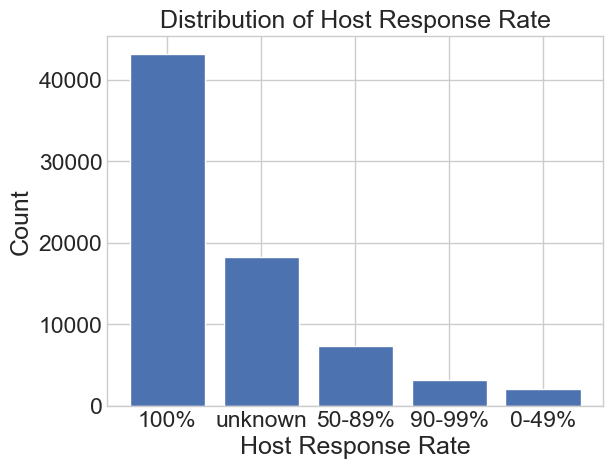

In [145]:
import matplotlib.pyplot as plt

plt.bar(df.host_response_rate.value_counts().index, df.host_response_rate.value_counts().values)
plt.xlabel('Host Response Rate')
plt.ylabel('Count')
plt.title('Distribution of Host Response Rate')
plt.show()


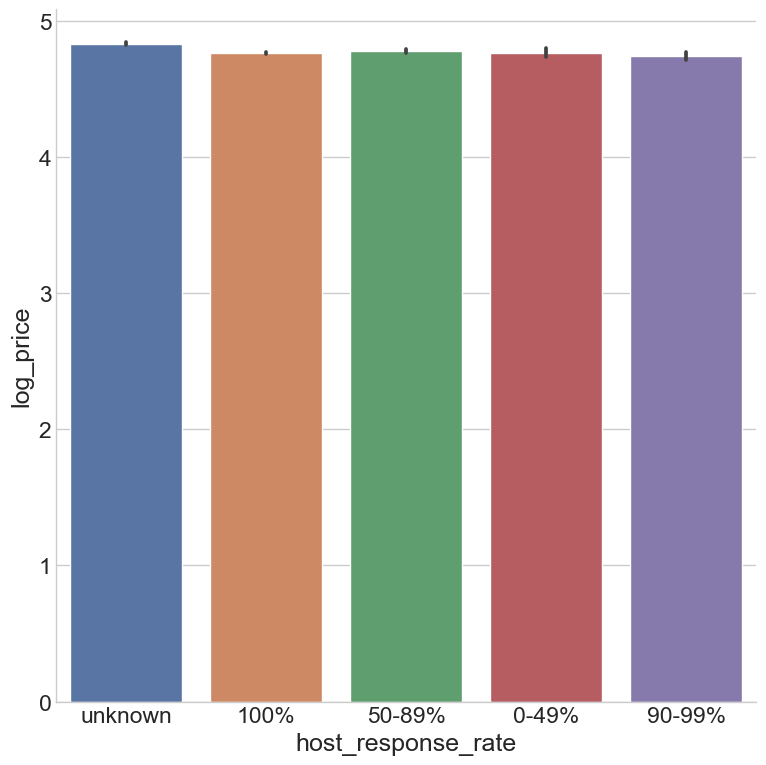

In [146]:
catplot('host_response_rate')

## review_scores_rating

In [147]:
df['review_scores_rating']

0        100.000000
1        93.000000 
2        92.000000 
3        94.067365 
4        40.000000 
           ...     
74106    94.067365 
74107    93.000000 
74108    94.000000 
74109    94.067365 
74110    96.000000 
Name: review_scores_rating, Length: 74111, dtype: float64

In [148]:
# Bin into four categories
df.review_scores_rating = pd.cut(df.review_scores_rating, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.review_scores_rating = df.review_scores_rating.astype('str')

# Replace nulls with 'unknown'
df.review_scores_rating.replace('nan', 'unknown', inplace=True)

# Category counts
df.review_scores_rating.value_counts()

review_scores_rating
90-99%    45552
100%      16215
50-89%    12114
0-49%     230  
Name: count, dtype: int64

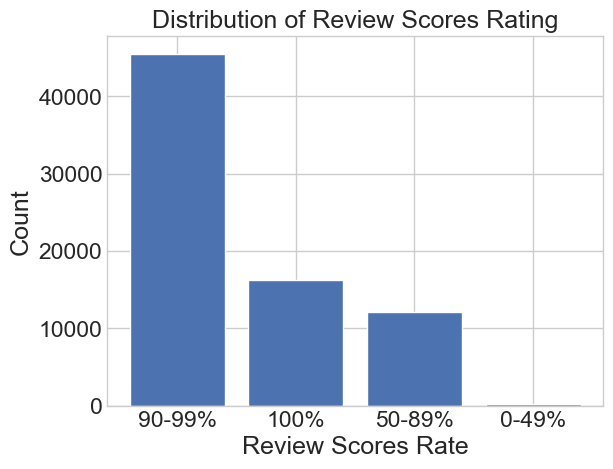

In [149]:
import matplotlib.pyplot as plt

plt.bar(df.review_scores_rating.value_counts().index, df.review_scores_rating.value_counts().values)
plt.xlabel('Review Scores Rate')
plt.ylabel('Count')
plt.title('Distribution of Review Scores Rating')
plt.show()


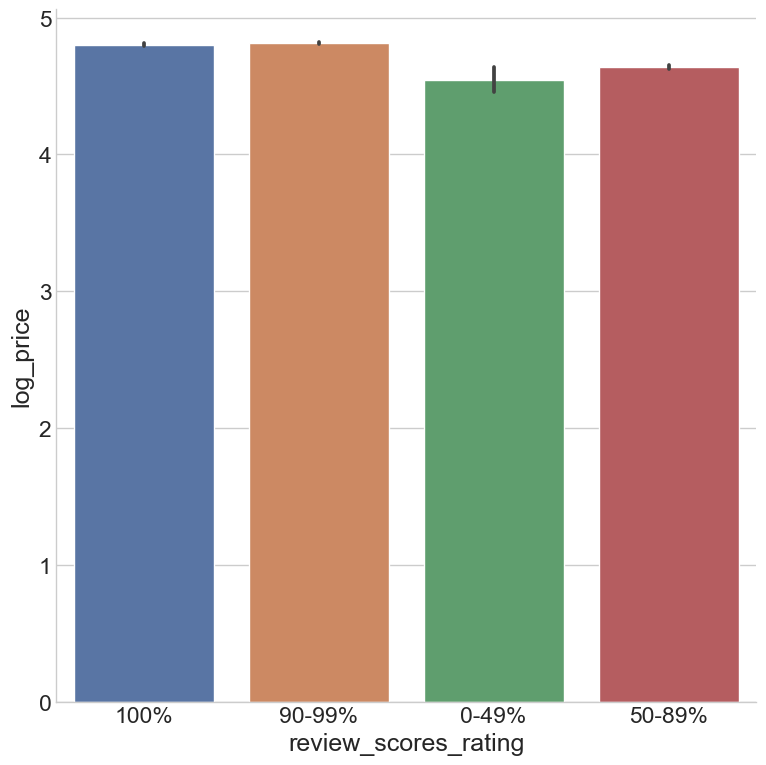

In [150]:
catplot('review_scores_rating')

## host_has_profile_pic

In [151]:
#We changed the true ones 1 the false ones 0 and filled the nan values with 0
df.loc[df.host_has_profile_pic == 't', 'host_has_profile_pic'] = 1
df.loc[df.host_has_profile_pic == 'f', 'host_has_profile_pic'] = 0

## host_identity_verified

In [152]:
#We changed the true ones 1 the false ones 0 and filled the nan values with 0
df.loc[df.host_identity_verified == 't', 'host_identity_verified'] = 1
df.loc[df.host_identity_verified == 'f', 'host_identity_verified'] = 0

## instant_bookable

In [153]:
#We changed the true ones 1 the false ones 0 
df.loc[df.instant_bookable == 't', 'instant_bookable'] = 1
df.loc[df.instant_bookable == 'f', 'instant_bookable'] = 0

## super_host

In [154]:
df['host_since_day'].mean()

3293.7451930212787

In [155]:
df['host_since_day'].min()

2123

In [156]:
df_iqr['number_of_reviews'].describe()

count    64765.000000
mean     10.486605   
std      13.818450   
min      0.000000    
25%      1.000000    
50%      4.000000    
75%      15.000000   
max      58.000000   
Name: number_of_reviews, dtype: float64

In [157]:
df['super_host'] = ((df['host_since_day'] > df['host_since_day'].mean()) &
                    (df['host_identity_verified'] == 1) &
                    (df['host_has_profile_pic'] == 1) &
                    ((df['host_response_rate'] == '90-99%') | (df['host_response_rate'] == '100%')) &
                    ((df['review_scores_rating'] == '90-99%') | (df['review_scores_rating'] == '100%'))
)

df['super_host']

0        False
1        False
2        False
3        False
4        False
         ...  
74106    False
74107    False
74108    True 
74109    False
74110    True 
Name: super_host, Length: 74111, dtype: bool

In [158]:
df['super_host'].astype('int')

0        0
1        0
2        0
3        0
4        0
        ..
74106    0
74107    0
74108    1
74109    0
74110    1
Name: super_host, Length: 74111, dtype: int32

In [159]:
df['super_host'].value_counts()

super_host
False    58762
True     15349
Name: count, dtype: int64

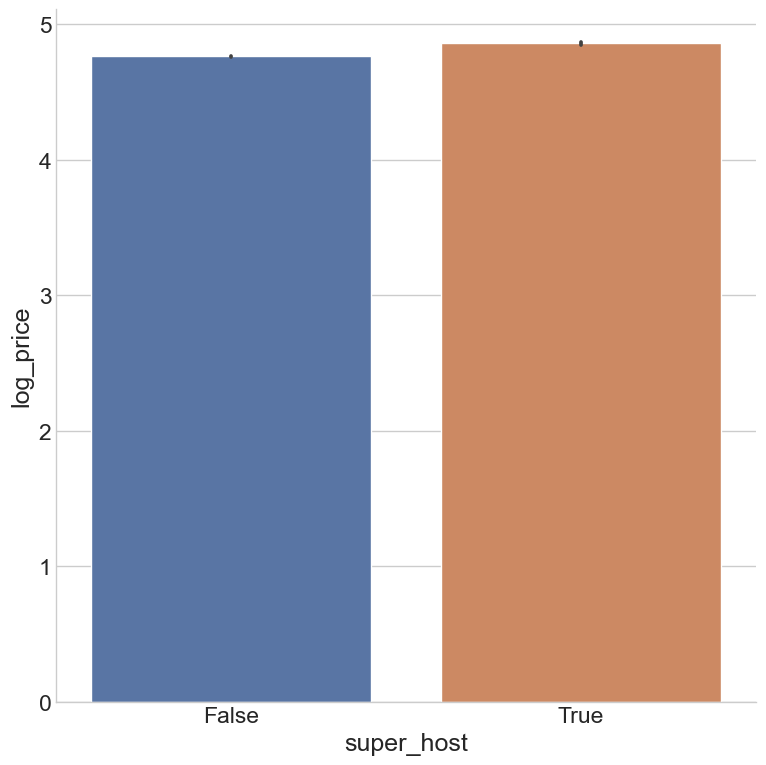

In [160]:
import seaborn as sns 
catplot('super_host')

## superhost icinde kullandigimiz sutunlari silinecek

### 30-median_home_value(Feature engineering)


In [161]:
# Creates a new column that gives us median house value of given zipcode

# def get_median_home_value(zipcode):
#     search = SearchEngine()
#     zipcode_data = search.by_zipcode(zipcode)
#     median_home_value = None
#     if zipcode_data is not None:
#         median_home_value = zipcode_data.median_home_value
#     search.close()
#     return median_home_value

# # Iterate over the df rows
# for index, row in df.iterrows():
#     median_home_value = get_median_home_value(row['zipcode'])
#     df.loc[index, 'median_home_value'] = median_home_value

In [162]:
df['median_home_value'] = pd.read_csv('median_zipcode.csv')['median_home_value'] #TO save time

In [163]:
# Checking if there is missing values
df['median_home_value'].isnull().sum()

0

In [164]:
# Lets handle missing values
df['median_home_value'] = df['median_home_value'].fillna(df['median_home_value'].mean())

## distance_to_center

In [165]:
# Defining center coordinates of each city

for index, row in df.iterrows():
    if df.loc[index, 'city'] == 'NYC':
        df.loc[index, 'lat_center'] = 40.72
        df.loc[index, 'long_center'] = -74.0060
    elif df.loc[index, 'city'] == 'LA':
        df.loc[index, 'lat_center'] = 34.0522
        df.loc[index, 'long_center'] = -118.2437
    elif df.loc[index, 'city'] == 'SF':
        df.loc[index, 'lat_center'] = 37.7749
        df.loc[index, 'long_center'] = -122.4194
    elif df.loc[index, 'city'] == 'DC':
        df.loc[index, 'lat_center'] = 38.9072
        df.loc[index, 'long_center'] = -77.0369
    elif df.loc[index, 'city'] == 'Chicago':
        df.loc[index, 'lat_center'] = 41.8781
        df.loc[index, 'long_center'] = -87.6298
    elif df.loc[index, 'city'] == 'Boston':
        df.loc[index, 'lat_center'] = 42.3601
        df.loc[index, 'long_center'] = -71.0589
        

In [166]:
# Creates the new column
df['distance_to_center']=np.sqrt((df['lat_center']-df['latitude'])**2+(df['long_center']-df['longitude'])**2)

In [167]:
def corr_columns(df,c1):
    print (np.corrcoef(df[c1], df['log_price']))
    sns.regplot(x=df[c1],y=df['log_price'],fit_reg=True,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.show()

[[ 1.         -0.13246795]
 [-0.13246795  1.        ]]


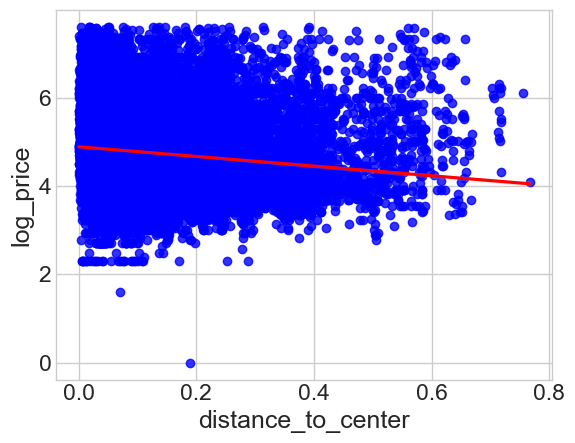

In [168]:
# lets see how our new column effect log_price
corr_columns(df,'distance_to_center')

[[1.         0.29971989]
 [0.29971989 1.        ]]


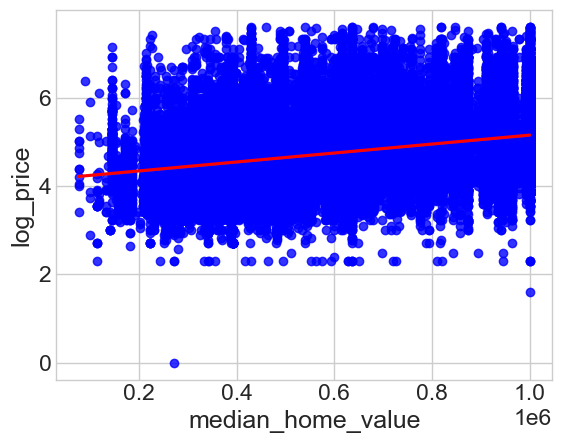

In [169]:
corr_columns(df,'median_home_value')

In [165]:

del df['first_review'] #  Used to create 'super_host'
del df['host_since'] # # Used to create 'super_host'
del df['last_review'] #  Used to create 'super_host'

del df['neighbourhood'] # String values
del df['city'] # get dummies is implemented
del df['latitude'] # Coordinates
del df['longitude'] # Coordinates
del df['host_response_rate'] # Used to create 'super_host'
del df['review_scores_rating'] # Used to create 'super_host'
del df['bedrooms'] # High correlation with accomadation
del df['host'] # High correlation with accomadation
del df['beds'] # High correlation with accomadation
del df['beds'] # High correlation with accomadation


In [166]:
# df = pd.get_dummies(df, columns=["host_response_rate"])

In [167]:
# df = pd.get_dummies(df, columns=["review_scores_rating"])

In [168]:
# df = pd.get_dummies(df, columns=["bedrooms"])

# bunu allalim mi 

In [169]:
# df = pd.get_dummies(df, columns=["beds"])

In [170]:
for column in df.columns:
    if df[column].isnull().sum() != 0 :
        print(column)

check_in_24h
air_conditioning
high_end_electronics
bbq
balcony
breakfast
tv
coffee_machine
cooking_basics
white_goods
elevator
gym
child_friendly
parking
outdoor_space
host_greeting
hot_tub_sauna_or_pool
internet
long_term_stays
pets_allowed
private_entrance
secure
smoking_allowed
accessible
event_suitable
time_since_last_review


In [171]:
df['time_since_last_review'].isnull().sum()

15827

In [172]:
df['time_since_last_review'] = df['time_since_last_review'].fillna(0)

In [173]:
df

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,thumbnail_url,zipcode,...,LA,NYC,SF,time_since_last_review,host_since_day,super_host,median_home_value,lat_center,long_center,distance_to_center
0,5.010635,3,1.0,1,1,1,0,2,1,11201,...,False,True,False,2565.0,4140,False,669000.0,40.7200,-74.0060,0.027532
1,5.129899,7,1.0,1,1,0,1,6,1,10019,...,False,True,False,2133.0,2229,False,808600.0,40.7200,-74.0060,0.049135
2,4.976734,5,1.0,1,1,1,1,10,1,10027,...,False,True,False,2142.0,2466,False,716100.0,40.7200,-74.0060,0.107878
3,6.620073,4,1.0,1,1,1,0,0,1,94117,...,False,False,True,0.0,3021,False,911500.0,37.7749,-122.4194,0.012557
4,4.744932,2,1.0,1,1,1,1,4,0,20009,...,False,False,False,2377.0,3070,False,539400.0,38.9072,-77.0369,0.018570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,1,1.0,0,1,1,0,0,1,11206,...,False,True,False,0.0,3777,False,533400.0,40.7200,-74.0060,0.067493
74107,5.043425,4,2.0,1,1,0,0,16,1,90254,...,True,False,False,2294.0,2641,False,1000001.0,34.0522,-118.2437,0.236318
74108,5.220356,5,1.0,1,1,1,1,43,1,11206,...,False,True,False,2146.0,4221,True,533400.0,40.7200,-74.0060,0.064988
74109,5.273000,2,1.0,1,1,0,1,0,1,10011,...,False,True,False,0.0,2139,False,914500.0,40.7200,-74.0060,0.019434


In [174]:
boolean_columns = df.select_dtypes(include='bool').columns
df[boolean_columns] = df[boolean_columns].astype(int)

In [175]:
df_final = remove_outliers(df, 'log_price', 0.001, 0.998)

max value is :  7.3132203870903005
min value is :  2.7080502011022096
137  rows removed


In [176]:
df_final = remove_outliers(df_final,'number_of_reviews',0.01,0.9997)

max value is :  388
min value is :  0
23  rows removed


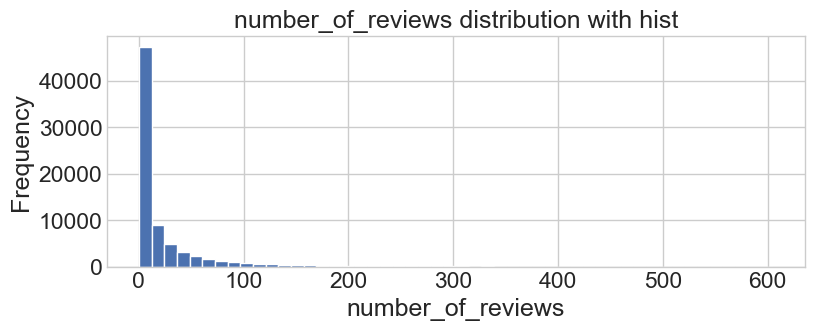

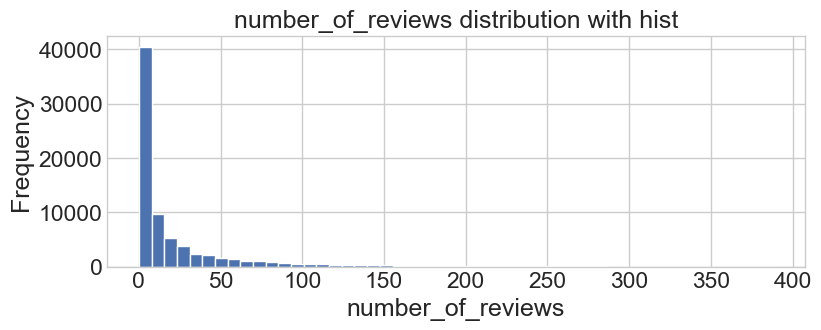

In [177]:
compare_dist(df,df_final,"number_of_reviews") # min_max method before and after

# Normalization check

In [178]:
# numeric columns
numerical_col = ['log_price','number_of_reviews','distance_to_center','median_home_value']

In [179]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Perform normality tests for each numeric column
for column in numerical_col:
    data = df_final[column].dropna()

    # Shapiro-Wilk test
    shapiro_stat, shapiro_pvalue = stats.shapiro(data)
    shapiro_normal = shapiro_pvalue > 0.05

    # Anderson-Darling test
    anderson_stat, anderson_crit, anderson_sign = stats.anderson(data)
    anderson_normal = anderson_stat < anderson_crit[anderson_sign == 15][0]

    # D'Agostino's K^2 test
    dagostino_stat, dagostino_pvalue = stats.normaltest(data)
    dagostino_normal = dagostino_pvalue > 0.05

    # Jarque-Bera test
    jarquebera_stat, jarquebera_pvalue = stats.jarque_bera(data)
    jarquebera_normal = jarquebera_pvalue > 0.05

    print(f"Column: {column}")
    print(f"Shapiro-Wilk test - Normal: {shapiro_normal}")
    print(f"Anderson-Darling test - Normal: {anderson_normal}")
    print(f"D'Agostino's K^2 test - Normal: {dagostino_normal}")
    print(f"Jarque-Bera test - Normal: {jarquebera_normal}")
    print()

Column: log_price
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: number_of_reviews
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: distance_to_center
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: median_home_value
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False



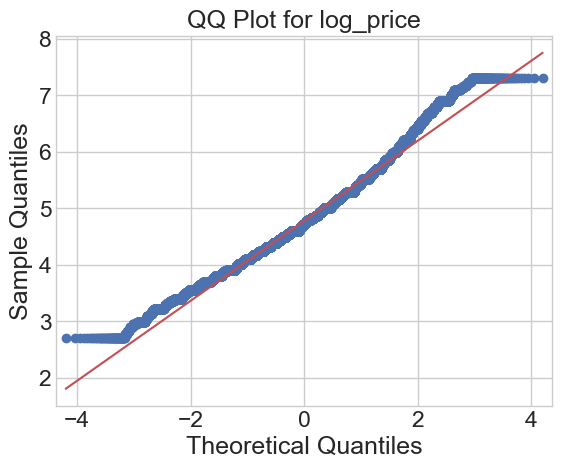

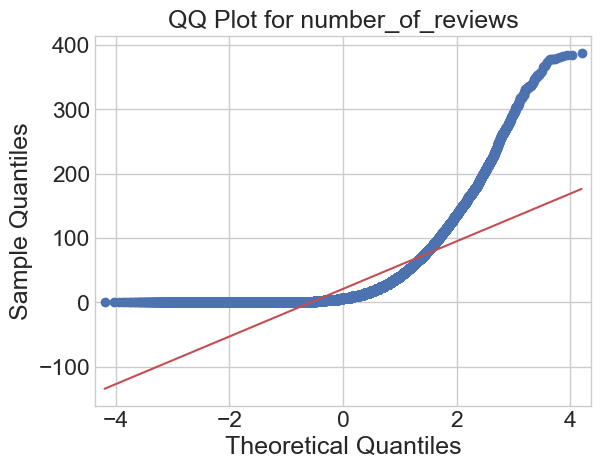

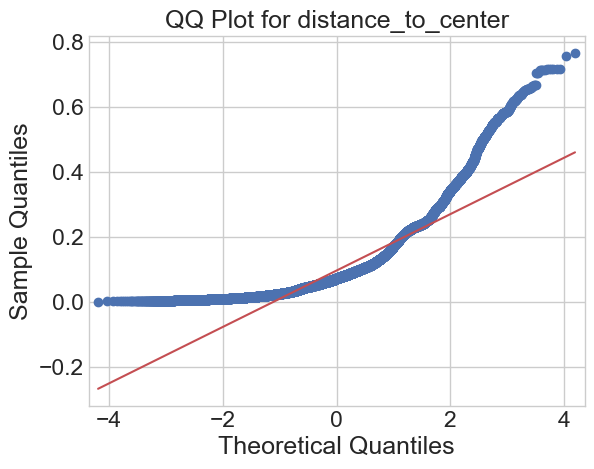

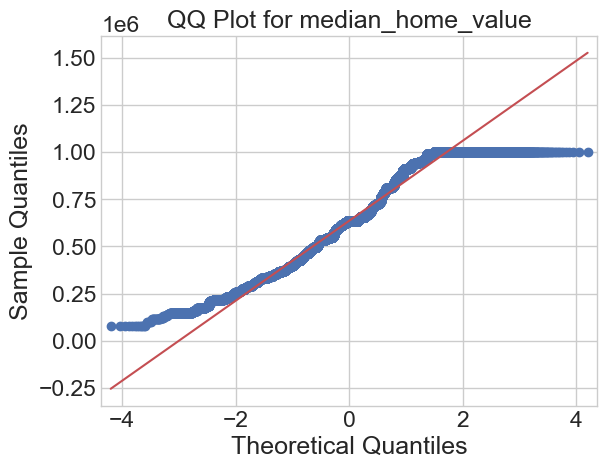

In [180]:
import statsmodels.api as sm
# Perform normality check using QQ plot
for column in numerical_col:
    # Create QQ plot
    sm.qqplot(df_final[column], line='s')
    plt.title(f"QQ Plot for {column}")
    plt.show()



In [181]:
def transformation_numerical(col): 
    # Select only the numeric columns
    numeric_data = df_final[numerical_col]
    # Perform  transformations on each numeric column
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)
    reciprocal_transformed_df = 1 / (numeric_data + 1)

    # Plot the original and transformed datas for a single column
    column = col
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    plt.hist(numeric_data[column], bins=20)
    plt.title(f'{column} in Original Data')
    plt.subplot(2, 2, 2)
    plt.hist(log_transformed_df[column], bins=20)
    plt.title(f'{column} in Logarithmic Transformation')
    plt.subplot(2, 2, 3)
    plt.hist(sqrt_transformed_df[column], bins=20)
    plt.title(f'{column} in Square Root Transformation')
    plt.subplot(2, 2, 4)
    plt.hist(power_transformed_df[column], bins=20)
    plt.title(f'{column} in Power Transformation')
    plt.tight_layout()
    plt.show()

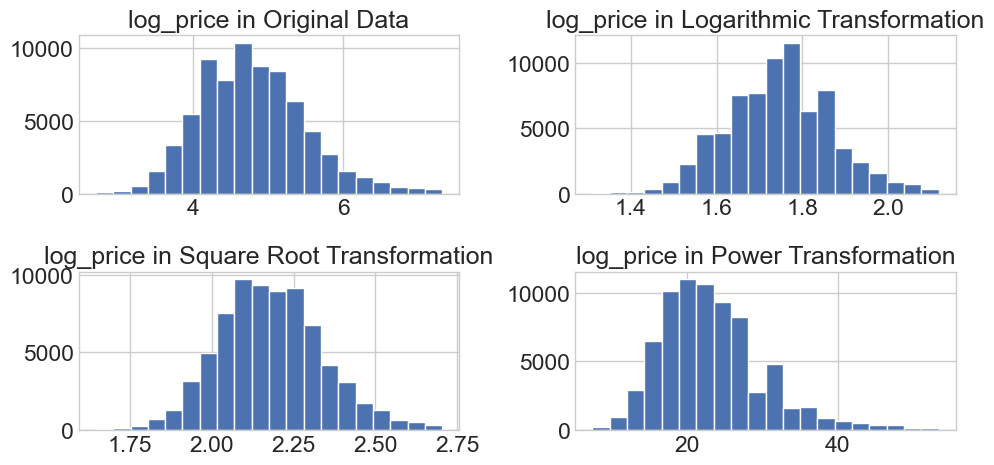

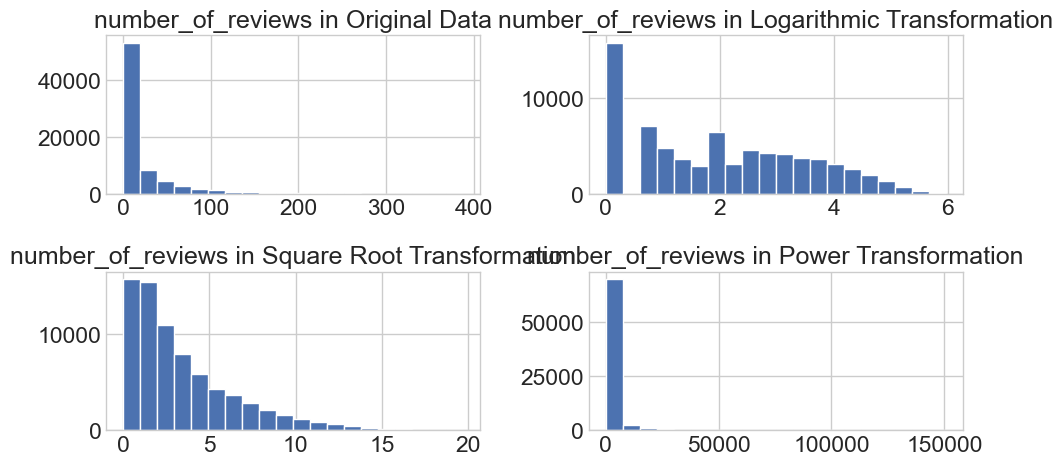

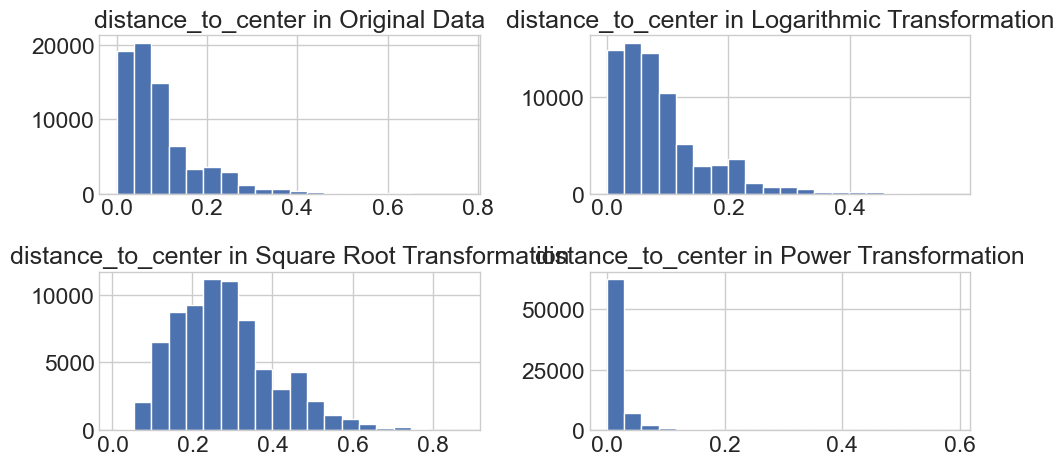

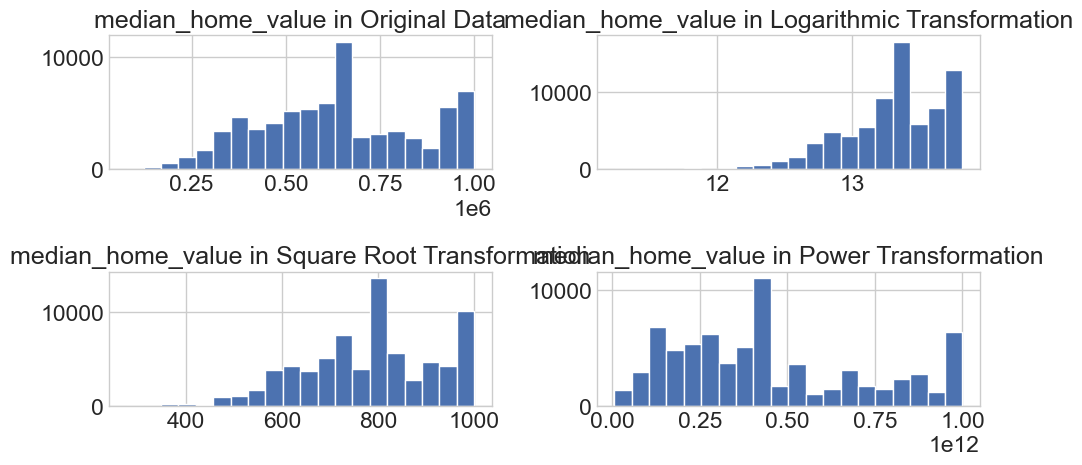

In [182]:
# applying the method to our data
for i in numerical_col :
    transformation_numerical(i)

# Transformation

In [183]:
import statsmodels.api as sm
def normality_b_a_transformed(col):
    column = col

    numeric_data = df_final[numerical_col]

    log_transformed_cleaned_df = np.log1p(numeric_data)
    sqrt_transformed_cleaned_df = np.sqrt(numeric_data)
    power_transformed_cleaned_df = np.power(numeric_data, 2)

    sm.qqplot(numeric_data[column],line='s')
    plt.title(f"QQ Plot for {column} in Original Data")
    plt.show()
    sm.qqplot(log_transformed_cleaned_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Logarithmic Transformed Data")
    plt.show()
    sm.qqplot(sqrt_transformed_cleaned_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Square Root Transformed Data")
    plt.show()
    sm.qqplot(power_transformed_cleaned_df[column],line='s')
    plt.title(f"QQ Plot for {column} in Power Transformed Data")
    plt.show()

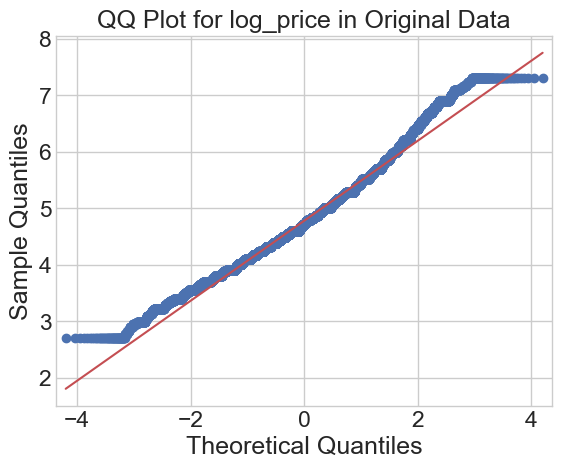

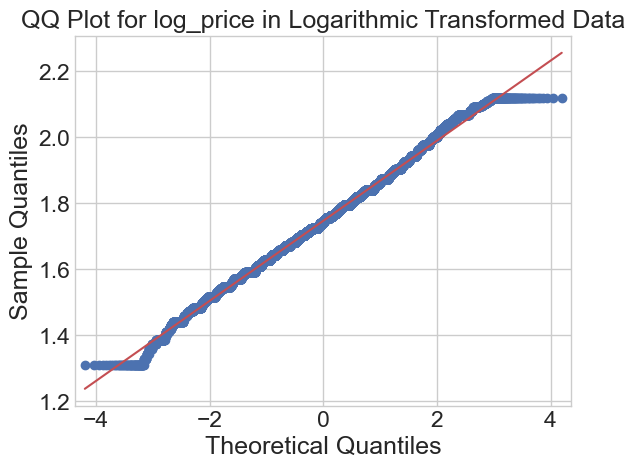

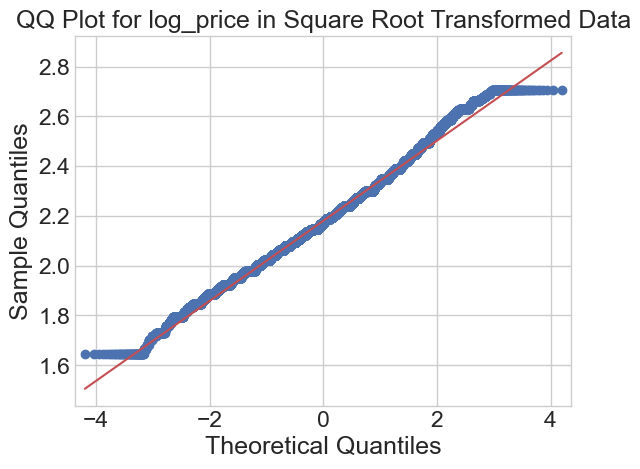

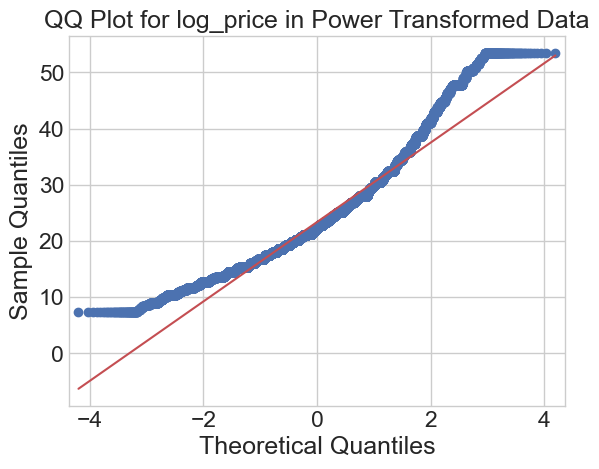

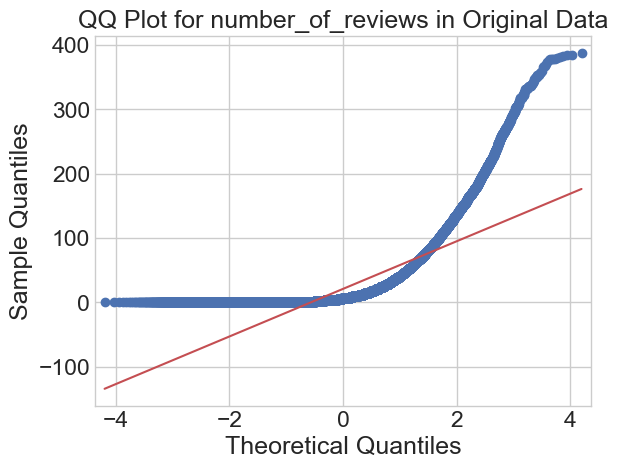

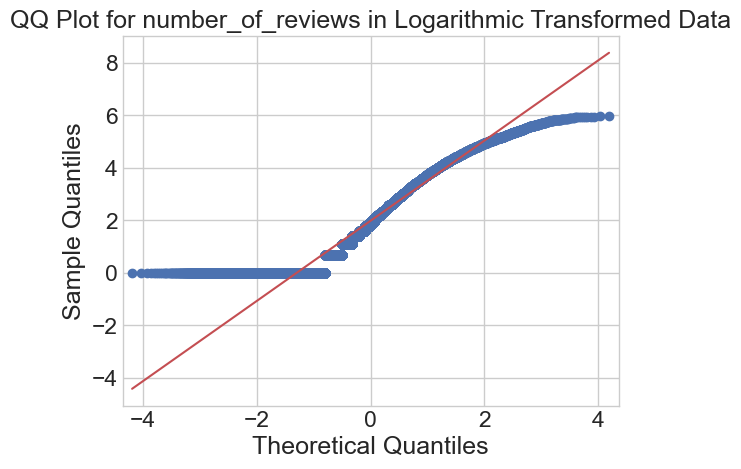

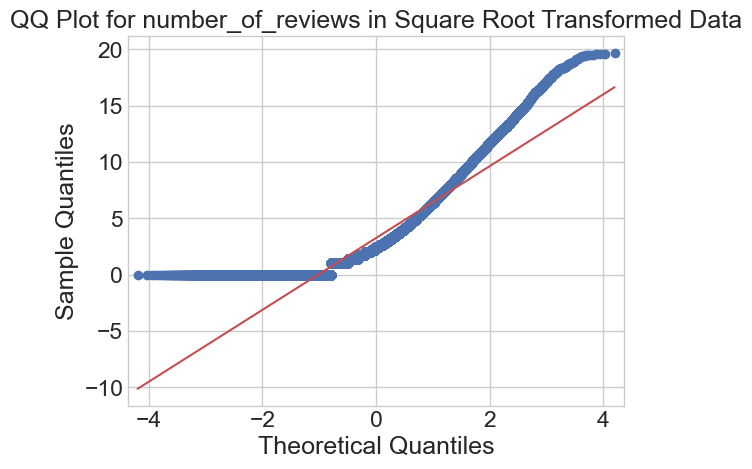

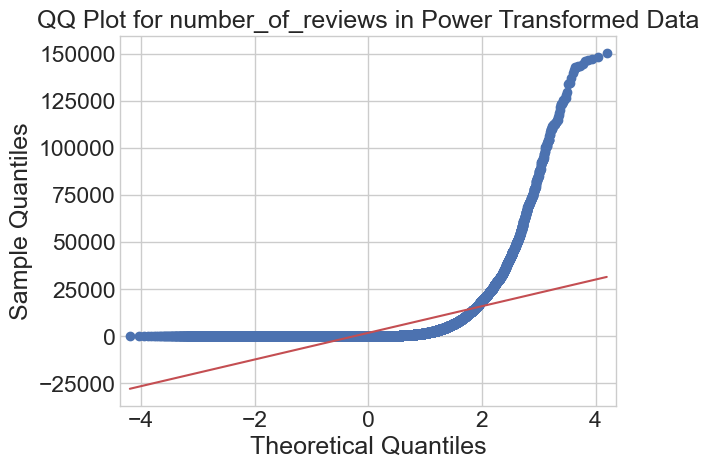

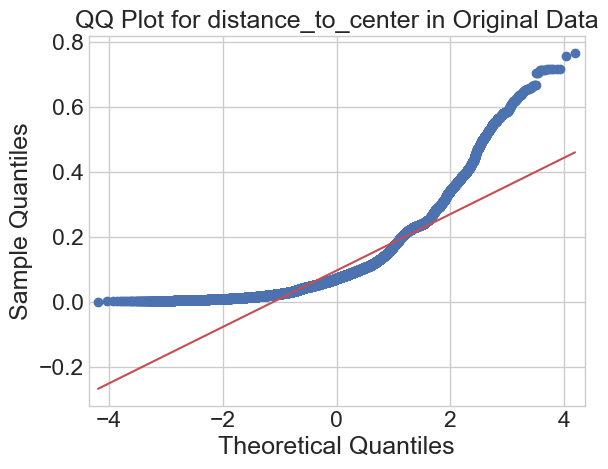

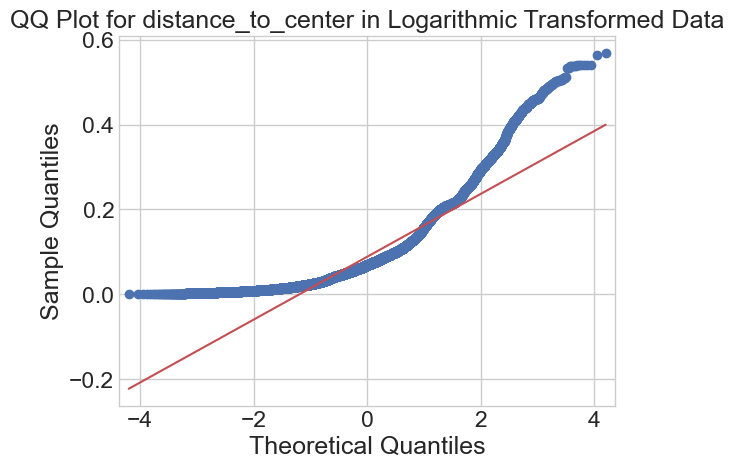

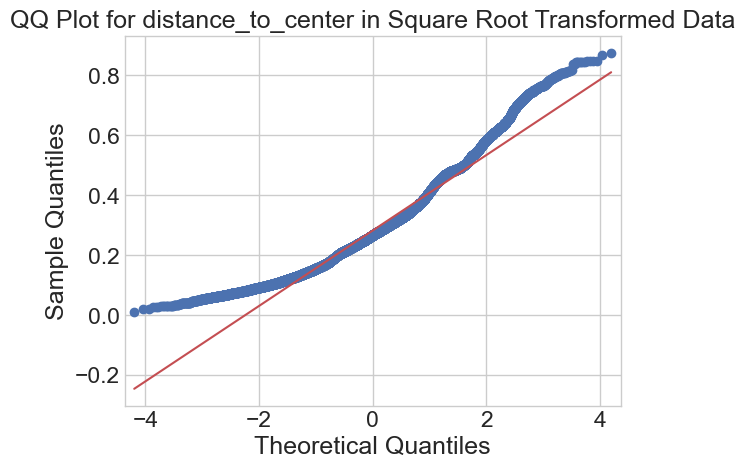

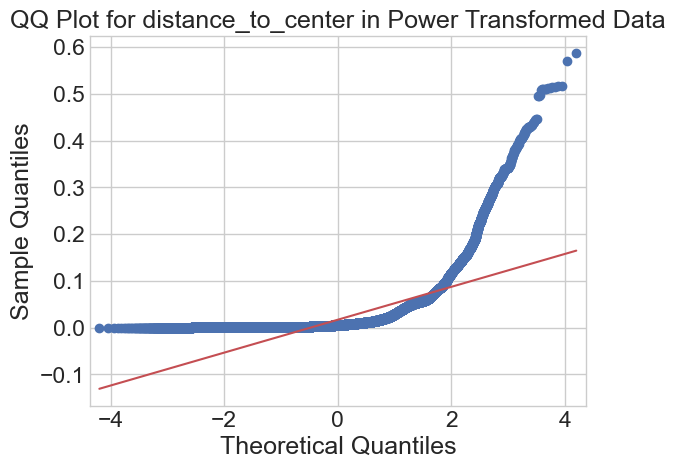

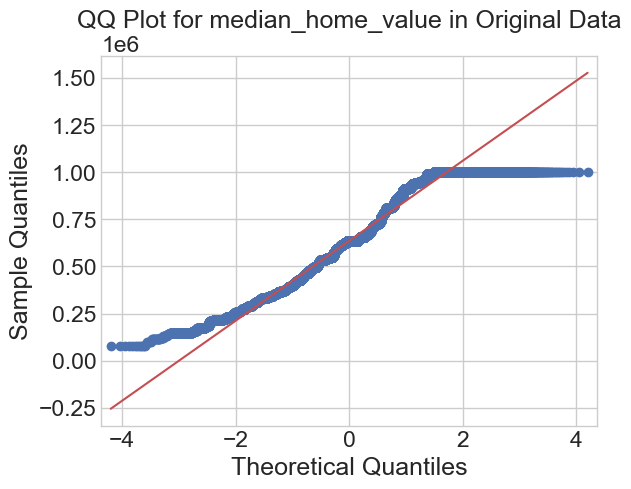

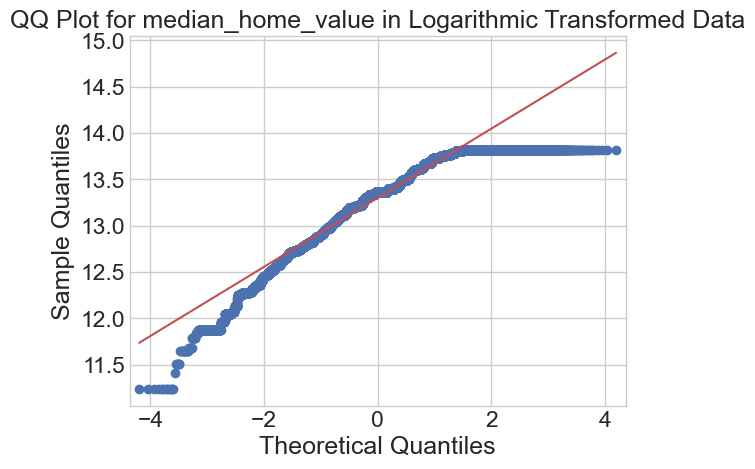

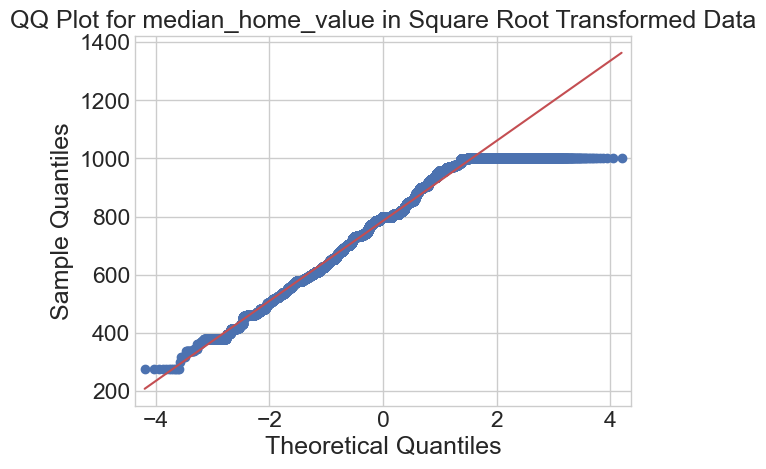

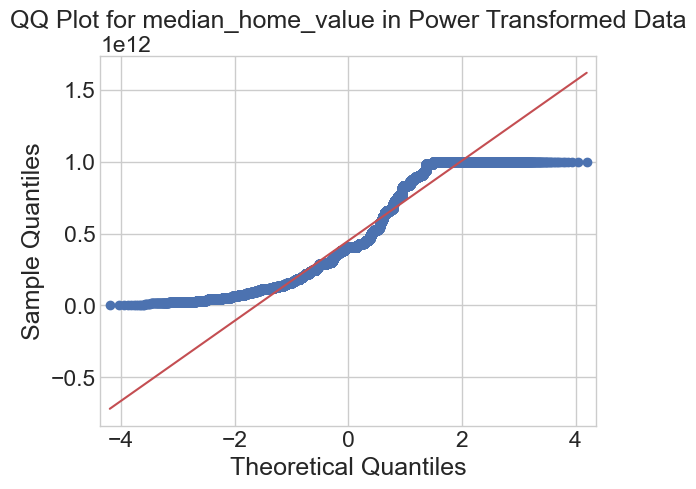

In [184]:
for i in numerical_col:
    normality_b_a_transformed(i)

In [185]:
df_final['median_home_value'] = np.sqrt(df_final['median_home_value'])
df_final['distance_to_center'] = np.sqrt(df_final['distance_to_center'])
df_final['number_of_reviews'] = np.log1p(df_final['number_of_reviews'])

del df_final['zipcode']
del df_final['lat_center']
del df_final['long_center']
# del df_final['number_of_reviews']
# del df_final['host_since_day']
# del df_final['time_since_last_review']

In [186]:
from sklearn.preprocessing import MinMaxScaler
# Perform min-max scaling
featuress = ['median_home_value','distance_to_center','number_of_reviews','host_since_day','time_since_last_review']
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_final[featuress])

# Create a new DataFrame with scaled features
df_final_scaled = pd.DataFrame(data_scaled, columns=featuress)


In [187]:
df_final_scaled.isnull().sum()

median_home_value         0
distance_to_center        0
number_of_reviews         0
host_since_day            0
time_since_last_review    0
dtype: int64

In [188]:
df_scaled = df_final.copy()

In [189]:
df_scaled[featuress] = df_final_scaled

In [192]:
cols_to_replace_nulls = df_scaled.iloc[:,29:].columns
df_scaled[cols_to_replace_nulls] = df_scaled[cols_to_replace_nulls].fillna(0)

In [195]:
df_scaled.to_csv('df_final.csv', index=False)